In [1]:
from dl import queryClient as qc
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import numpy as np
from matplotlib.colors import LogNorm
from astropy.io import ascii
from astropy.io import fits
from astropy.table import Table
import statistics as st
from numpy import nan
from dlnpyutils import utils as dln

In [2]:
lmc_gaia_catalog_source_10deg_dec53 = Table.read('/Users/slaterjonesoden/Desktop/LMC_Periphery/gaia_source_10deg_ra_dec_90_53_extra.fits')


In [3]:
lmc_gaia_catalog_source_10deg_dec53

ra,ra_error,dec,dec_error,pmra,pmra_error,pmdec,pmdec_error,parallax,parallax_error,pm,radial_velocity,radial_velocity_error,b,l,ecl_lat,ecl_lon,teff_gspphot,logg_gspphot,phot_bp_mean_mag,phot_rp_mean_mag,phot_g_mean_mag,mlon,mlat,pmml,pmmb,lmc_radius,MUNMOD,MUWMOD,MUNCM,MUWCM,MUNPN,MUWPN,MUNINT,MUWINT,vrfac,vrfacpm,pmint_fac,RPRI,VRAD,pmra_model,pmdec_model,pm_model,mlon_model,mlat_model,pmml_model,pmmb_model
,,,,,,,,,,,,,,,,,,,,,,deg,deg,,,deg,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,,,,kpc,km / s,mas / yr,mas / yr,mas / yr,deg,deg,,
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
81.70904571133516,0.358216,-44.626987507909305,0.358372,1.2799744344296506,0.475699,-0.1074476899657884,0.491463,0.4792669336636608,0.39586,1.284476,--,--,-33.28921287149829,250.36653862679398,-67.61680411079617,74.36534927847174,--,--,20.435816,19.857458,20.376425,-1.0351867589309904,27.543613093223637,1.2836774309819208,-0.04529693212724763,27.563059225257756,-0.3076811212906125,-1.8145385983911846,-0.292830319297863,-2.076147698492596,-0.006996413891629097,-0.0948009498968177,-0.007854388101120465,0.35641004999822856,0.4489321959807285,0.8935658248903215,0.9702916144512771,21.39007969636435,87.294243,1.8145385983911846,-0.3076811212906125,1.840439620702101,-1.0351867589309904,27.543613093223637,1.8273164480176125,-0.2193914224722109
81.87707903470252,0.608826,-44.69351501051816,0.591684,2.1004855699594316,0.768366,0.0757709512100989,0.766263,-0.0212867313715062,0.650746,2.101852,--,--,-33.17845284588164,250.4625037880013,-67.70043874434425,74.65010229056482,--,--,20.964222,19.669306,20.680897,-0.8970581888159472,27.482760862985497,2.09489923618503,0.17081585665988586,27.49739729585637,-0.3004708904761044,-1.8141405068761218,-0.2874821586828384,-2.076520896923571,-0.006607522806783813,-0.09477974054099729,-0.006381208986482209,0.3571601305884463,0.44727352975676565,0.8943972213613612,0.9722527545116347,21.33455927134813,87.294243,1.8141405068761218,-0.3004708904761044,1.8388552239674159,-0.8970581888159472,27.482760862985497,1.8258864428703079,-0.2180074137607786
82.20106688280971,0.041726,-44.60879616535566,0.045113,1.4377651391489865,0.055258,0.2922891633425544,0.057817,1.1943306873791468,0.046167,1.467175,--,--,-32.93936676230822,250.39566364203608,-67.6500435437614,75.28280435115575,4446.3125,4.5824,17.752947,16.182499,17.008783,-0.6414140889055489,27.577146627480477,1.4251831073073524,0.3485034591009832,27.584604911925137,-0.2923795698760054,-1.813802821856549,-0.2815595141586996,-2.076881076322959,-0.006611147905687913,-0.09546902039709414,-0.004208907811617822,0.3585472748635042,0.4439787564158996,0.8960373116401968,0.9759402972265816,21.39996435072298,87.294243,1.813802821856549,-0.2923795698760054,1.8372170501755252,-0.6414140889055489,27.577146627480477,1.8238821665177083,-0.22095323512979467
82.06825206524076,0.371359,-44.72176833851565,0.427562,1.2105521320854522,0.572672,0.4170458092367242,0.592754,0.2805861984648654,0.415648,1.280376,--,--,-33.046975477652936,250.5155210209066,-67.74829702711145,74.99374213043464,--,--,20.479856,19.818653,20.32374,-0.7426827743749413,27.460443541256122,1.1921087163324977,0.4671621559401305,27.4704848371096,-0.2935403435322679,-1.8137599839861445,-0.2823589689493167,-2.076842321133928,-0.006330112271397263,-0.09491463638820478,-0.0048512623115538915,0.3579969735359887,0.44535073573055867,0.8953561984954648,0.9744647439681074,21.31010667942292,87.294243,1.8137599839861445,-0.2935403435322679,1.8373598484756493,-0.7426827743749413,27.460443541256122,1.8244227974617842,-0.2176526335521155
81.99688653931278,0.356502,-44.625742641911174,0.421407,1.97933

# Converting pmra_model and pmdec_model to pmml_model and pmmb_model

In [4]:
# Code to convert from ra,dec to Lat,Long in Magellanic Cloud Coordinates
import numpy as np
from gala.coordinates import MagellanicStreamNidever08
from astropy.coordinates import SkyCoord
import astropy.units as u

# convert pmra/pmdec to pmml/pmmb
coo = SkyCoord(ra=lmc_gaia_catalog_source_10deg_dec53['ra'].data*u.deg, dec=lmc_gaia_catalog_source_10deg_dec53['dec'].data*u.deg,
        pm_ra_cosdec=lmc_gaia_catalog_source_10deg_dec53['pmra_model'].data*u.mas/u.yr,
        pm_dec=lmc_gaia_catalog_source_10deg_dec53['pmdec_model'].data*u.mas/u.yr,frame='icrs')
mcoo = coo.transform_to(MagellanicStreamNidever08)
# lmc_gaia_catalog_source_10deg_dec53['mlon_model'] = 0.0
# lmc_gaia_catalog_source_10deg_dec53['mlat_model'] = 0.0
lmc_gaia_catalog_source_10deg_dec53['pmml_model'] = 0.0
lmc_gaia_catalog_source_10deg_dec53['pmmb_model'] = 0.0
# lmc_gaia_catalog_source_10deg_dec53['mlon_model'] = mcoo.L
# lmc_gaia_catalog_source_10deg_dec53['mlat_model'] = mcoo.B
lmc_gaia_catalog_source_10deg_dec53['pmml_model'] = mcoo.pm_L_cosB.value
lmc_gaia_catalog_source_10deg_dec53['pmmb_model'] = mcoo.pm_B.value

# pmml 1.80 , pmmb 0.45, pmdist < 1.3

# pmdist = np.sqrt((lmc_gaia_catalog_source_10deg_dec53['pmml_model']-1.70)**2 + (lmc_gaia_catalog_source_10deg_dec53['pmmb_model']-0.40)**2)
# gdpm, = np.where((pmdist < 0.7))

In [5]:
lmc_gaia_catalog_source_10deg_dec53.write("/Users/slaterjonesoden/Desktop/LMC_Periphery/gaia_source_10deg_ra_dec_90_53_extra.fits", overwrite="True")
lmc_gaia_catalog_source_10deg_dec53

ra,ra_error,dec,dec_error,pmra,pmra_error,pmdec,pmdec_error,parallax,parallax_error,pm,radial_velocity,radial_velocity_error,b,l,ecl_lat,ecl_lon,teff_gspphot,logg_gspphot,phot_bp_mean_mag,phot_rp_mean_mag,phot_g_mean_mag,mlon,mlat,pmml,pmmb,lmc_radius,MUNMOD,MUWMOD,MUNCM,MUWCM,MUNPN,MUWPN,MUNINT,MUWINT,vrfac,vrfacpm,pmint_fac,RPRI,VRAD,pmra_model,pmdec_model,pm_model,mlon_model,mlat_model,pmml_model,pmmb_model
,,,,,,,,,,,,,,,,,,,,,,deg,deg,,,deg,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,,,,kpc,km / s,mas / yr,mas / yr,mas / yr,deg,deg,,
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
81.70904571133516,0.358216,-44.626987507909305,0.358372,1.2799744344296506,0.475699,-0.1074476899657884,0.491463,0.4792669336636608,0.39586,1.284476,--,--,-33.28921287149829,250.36653862679398,-67.61680411079617,74.36534927847174,--,--,20.435816,19.857458,20.376425,-1.0351867589309904,27.543613093223637,1.2836774309819208,-0.04529693212724763,27.563059225257756,-0.3076811212906125,-1.8145385983911846,-0.292830319297863,-2.076147698492596,-0.006996413891629097,-0.0948009498968177,-0.007854388101120465,0.35641004999822856,0.4489321959807285,0.8935658248903215,0.9702916144512771,21.39007969636435,87.294243,1.8145385983911846,-0.3076811212906125,1.840439620702101,-1.0351867589309904,27.543613093223637,1.8273164480176125,-0.2193914224722109
81.87707903470252,0.608826,-44.69351501051816,0.591684,2.1004855699594316,0.768366,0.0757709512100989,0.766263,-0.0212867313715062,0.650746,2.101852,--,--,-33.17845284588164,250.4625037880013,-67.70043874434425,74.65010229056482,--,--,20.964222,19.669306,20.680897,-0.8970581888159472,27.482760862985497,2.09489923618503,0.17081585665988586,27.49739729585637,-0.3004708904761044,-1.8141405068761218,-0.2874821586828384,-2.076520896923571,-0.006607522806783813,-0.09477974054099729,-0.006381208986482209,0.3571601305884463,0.44727352975676565,0.8943972213613612,0.9722527545116347,21.33455927134813,87.294243,1.8141405068761218,-0.3004708904761044,1.8388552239674159,-0.8970581888159472,27.482760862985497,1.8258864428703079,-0.2180074137607786
82.20106688280971,0.041726,-44.60879616535566,0.045113,1.4377651391489865,0.055258,0.2922891633425544,0.057817,1.1943306873791468,0.046167,1.467175,--,--,-32.93936676230822,250.39566364203608,-67.6500435437614,75.28280435115575,4446.3125,4.5824,17.752947,16.182499,17.008783,-0.6414140889055489,27.577146627480477,1.4251831073073524,0.3485034591009832,27.584604911925137,-0.2923795698760054,-1.813802821856549,-0.2815595141586996,-2.076881076322959,-0.006611147905687913,-0.09546902039709414,-0.004208907811617822,0.3585472748635042,0.4439787564158996,0.8960373116401968,0.9759402972265816,21.39996435072298,87.294243,1.813802821856549,-0.2923795698760054,1.8372170501755252,-0.6414140889055489,27.577146627480477,1.8238821665177083,-0.22095323512979467
82.06825206524076,0.371359,-44.72176833851565,0.427562,1.2105521320854522,0.572672,0.4170458092367242,0.592754,0.2805861984648654,0.415648,1.280376,--,--,-33.046975477652936,250.5155210209066,-67.74829702711145,74.99374213043464,--,--,20.479856,19.818653,20.32374,-0.7426827743749413,27.460443541256122,1.1921087163324977,0.4671621559401305,27.4704848371096,-0.2935403435322679,-1.8137599839861445,-0.2823589689493167,-2.076842321133928,-0.006330112271397263,-0.09491463638820478,-0.0048512623115538915,0.3579969735359887,0.44535073573055867,0.8953561984954648,0.9744647439681074,21.31010667942292,87.294243,1.8137599839861445,-0.2935403435322679,1.8373598484756493,-0.7426827743749413,27.460443541256122,1.8244227974617842,-0.2176526335521155
81.99688653931278,0.356502,-44.625742641911174,0.421407,1.97933

In [66]:
lmc_gaia_catalog_source_10deg_dec53['lmc_radius_correct'] = ((lmc_gaia_catalog_source_10deg_dec53['mlon'])**2 + (lmc_gaia_catalog_source_10deg_dec53['mlat'] -2.3 )**2 )**(0.5)


In [54]:
lmc_gaia_catalog_source_10deg_dec53['pmra_model'] = (lmc_gaia_catalog_source_10deg_dec53['MUWMOD'] * -1)
lmc_gaia_catalog_source_10deg_dec53['pmdec_model'] = (lmc_gaia_catalog_source_10deg_dec53['MUNMOD'])
lmc_gaia_catalog_source_10deg_dec53['pm_model'] = ((lmc_gaia_catalog_source_10deg_dec53['pmra_model'])**2 + (lmc_gaia_catalog_source_10deg_dec53['pmdec_model'])**2)**(0.5)
lmc_gaia_catalog_source_10deg_dec53.write('/Users/slaterjonesoden/Desktop/LMC_Periphery/gaia_source_10deg_ra_dec_90_53_extra.fits', overwrite = True)


In [55]:
lmc_gaia_catalog_source_10deg_dec53 = Table.read('/Users/slaterjonesoden/Desktop/LMC_Periphery/gaia_source_10deg_ra_dec_90_53_extra.fits')
lmc_gaia_catalog_source_10deg_dec53

ra,ra_error,dec,dec_error,pmra,pmra_error,pmdec,pmdec_error,parallax,parallax_error,pm,radial_velocity,radial_velocity_error,b,l,ecl_lat,ecl_lon,teff_gspphot,logg_gspphot,phot_bp_mean_mag,phot_rp_mean_mag,phot_g_mean_mag,mlon,mlat,pmml,pmmb,lmc_radius,MUNMOD,MUWMOD,MUNCM,MUWCM,MUNPN,MUWPN,MUNINT,MUWINT,vrfac,vrfacpm,pmint_fac,RPRI,VRAD,pmra_model,pmdec_model,pm_model
,,,,,,,,,,,,,,,,,,,,,,deg,deg,,,deg,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,mas / yr,,,,kpc,km / s,mas / yr,mas / yr,mas / yr
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
81.70904571133516,0.358216,-44.626987507909305,0.358372,1.2799744344296506,0.475699,-0.1074476899657884,0.491463,0.4792669336636608,0.39586,1.284476,--,--,-33.28921287149829,250.36653862679398,-67.61680411079617,74.36534927847174,--,--,20.435816,19.857458,20.376425,-1.0351867589309904,27.543613093223637,1.2836774309819208,-0.04529693212724763,27.563059225257756,-0.3076811212906125,-1.8145385983911846,-0.292830319297863,-2.076147698492596,-0.006996413891629097,-0.0948009498968177,-0.007854388101120465,0.35641004999822856,0.4489321959807285,0.8935658248903215,0.9702916144512771,21.39007969636435,87.294243,1.8145385983911846,-0.3076811212906125,1.840439620702101
81.87707903470252,0.608826,-44.69351501051816,0.591684,2.1004855699594316,0.768366,0.0757709512100989,0.766263,-0.0212867313715062,0.650746,2.101852,--,--,-33.17845284588164,250.4625037880013,-67.70043874434425,74.65010229056482,--,--,20.964222,19.669306,20.680897,-0.8970581888159472,27.482760862985497,2.09489923618503,0.17081585665988586,27.49739729585637,-0.3004708904761044,-1.8141405068761218,-0.2874821586828384,-2.076520896923571,-0.006607522806783813,-0.09477974054099729,-0.006381208986482209,0.3571601305884463,0.44727352975676565,0.8943972213613612,0.9722527545116347,21.33455927134813,87.294243,1.8141405068761218,-0.3004708904761044,1.8388552239674159
82.20106688280971,0.041726,-44.60879616535566,0.045113,1.4377651391489865,0.055258,0.2922891633425544,0.057817,1.1943306873791468,0.046167,1.467175,--,--,-32.93936676230822,250.39566364203608,-67.6500435437614,75.28280435115575,4446.3125,4.5824,17.752947,16.182499,17.008783,-0.6414140889055489,27.577146627480477,1.4251831073073524,0.3485034591009832,27.584604911925137,-0.2923795698760054,-1.813802821856549,-0.2815595141586996,-2.076881076322959,-0.006611147905687913,-0.09546902039709414,-0.004208907811617822,0.3585472748635042,0.4439787564158996,0.8960373116401968,0.9759402972265816,21.39996435072298,87.294243,1.813802821856549,-0.2923795698760054,1.8372170501755252
82.06825206524076,0.371359,-44.72176833851565,0.427562,1.2105521320854522,0.572672,0.4170458092367242,0.592754,0.2805861984648654,0.415648,1.280376,--,--,-33.046975477652936,250.5155210209066,-67.74829702711145,74.99374213043464,--,--,20.479856,19.818653,20.32374,-0.7426827743749413,27.460443541256122,1.1921087163324977,0.4671621559401305,27.4704848371096,-0.2935403435322679,-1.8137599839861445,-0.2823589689493167,-2.076842321133928,-0.006330112271397263,-0.09491463638820478,-0.0048512623115538915,0.3579969735359887,0.44535073573055867,0.8953561984954648,0.9744647439681074,21.31010667942292,87.294243,1.8137599839861445,-0.2935403435322679,1.8373598484756493
81.99688653931278,0.356502,-44.625742641911174,0.421407,1.97933864733137,0.534077,0.9202309876451884,0.555724,-0.6481280570198588,0.410407,2.182798,--,--,-33.08568621716185,250.39443039895738,-67.64591705654124,74.89819567385605,--,--,20.505016,19.786243,20.365425,-0.8044381601054056,27.554231897476207,1.9378660543959267,1.004630134259354,27.565972070894382,-0.29847587057185315,-1.8141192423771986,-0.28604689100216085,-2.0766201457342945,-0.00673895985598145

In [86]:
lmc_gaia_catalog_source_10deg_dec53['pmra_model_cm'] = ((lmc_gaia_catalog_source_10deg_dec53['MUWCM'] * -1))
lmc_gaia_catalog_source_10deg_dec53['pmdec_model_cm'] = (lmc_gaia_catalog_source_10deg_dec53['MUNCM'])

In [74]:
good_lmc_catalog10_53, = np.where(np.isfinite(lmc_gaia_catalog_source_10deg_dec53['ra']) & 
                              np.isfinite(lmc_gaia_catalog_source_10deg_dec53['ra_error']) & 
                              np.isfinite(lmc_gaia_catalog_source_10deg_dec53['dec']) &
                              np.isfinite(lmc_gaia_catalog_source_10deg_dec53['dec_error']) &
                              np.isfinite(lmc_gaia_catalog_source_10deg_dec53['pmra']) & 
                              np.isfinite(lmc_gaia_catalog_source_10deg_dec53['pmra_error']) & 
                              np.isfinite(lmc_gaia_catalog_source_10deg_dec53['pmdec']) & 
                              np.isfinite(lmc_gaia_catalog_source_10deg_dec53['pmdec_error']) & 
                              np.isfinite(lmc_gaia_catalog_source_10deg_dec53['parallax']) & 
                              np.isfinite(lmc_gaia_catalog_source_10deg_dec53['parallax_error']) & 
                              np.isfinite(lmc_gaia_catalog_source_10deg_dec53['pm']) & 
                              np.isfinite(lmc_gaia_catalog_source_10deg_dec53['phot_bp_mean_mag']) & 
                              np.isfinite(lmc_gaia_catalog_source_10deg_dec53['phot_rp_mean_mag']) & 
                              np.isfinite(lmc_gaia_catalog_source_10deg_dec53['phot_g_mean_mag']))

#np.isfinite(lmc_gaia_catalog_source_5deg['radial_velocity_error']) & 
#np.isfinite(lmc_gaia_catalog_source_5deg['teff_gspphot']) & 
# np.isfinite(lmc_gaia_catalog_source_5deg['logg_gspphot']) &
# np.isfinite(lmc_gaia_catalog_source_10deg_dec53['phot_bp_mean_mag']) & 
# np.isfinite(lmc_gaia_catalog_source_10deg_dec53['phot_rp_mean_mag']) & 
# np.isfinite(lmc_gaia_catalog_source_10deg_dec53['phot_g_mean_mag'])

In [87]:
# Code to convert from ra,dec to Lat,Long in Magellanic Cloud Coordinates
import numpy as np
from gala.coordinates import MagellanicStreamNidever08
from astropy.coordinates import SkyCoord
import astropy.units as u

# convert pmra/pmdec to pmml/pmmb
coo = SkyCoord(ra=lmc_gaia_catalog_source_10deg_dec53['ra'].data*u.deg, dec=lmc_gaia_catalog_source_10deg_dec53['dec'].data*u.deg,
        pm_ra_cosdec=lmc_gaia_catalog_source_10deg_dec53['pmra_model_cm'].data*u.mas/u.yr,
        pm_dec=lmc_gaia_catalog_source_10deg_dec53['pmdec_model_cm'].data*u.mas/u.yr,frame='icrs')
mcoo = coo.transform_to(MagellanicStreamNidever08)
# lmc_gaia_catalog_source_10deg_dec53['mlon'] = 0.0
# lmc_gaia_catalog_source_10deg_dec53['mlat'] = 0.0
lmc_gaia_catalog_source_10deg_dec53['pmml_model_cm'] = 0.0
lmc_gaia_catalog_source_10deg_dec53['pmmb_model_cm'] = 0.0
# lmc_gaia_catalog_source_10deg_dec53['mlon'] = mcoo.L
# lmc_gaia_catalog_source_10deg_dec53['mlat'] = mcoo.B
lmc_gaia_catalog_source_10deg_dec53['pmml_model_cm'] = mcoo.pm_L_cosB.value
lmc_gaia_catalog_source_10deg_dec53['pmmb_model_cm'] = mcoo.pm_B.value

# pmml 1.80 , pmmb 0.45, pmdist < 1.3

# pmdist = np.sqrt((lmc_gaia_catalog_source_10deg_dec53['pmml']-1.70)**2 + (lmc_gaia_catalog_source_10deg_dec53['pmmb']-0.40)**2)
# gdpm, = np.where((pmdist < 0.7))

In [75]:
# Code to convert from ra,dec to Lat,Long in Magellanic Cloud Coordinates
import numpy as np
from gala.coordinates import MagellanicStreamNidever08
from astropy.coordinates import SkyCoord
import astropy.units as u

# convert pmra/pmdec to pmml/pmmb
coo = SkyCoord(ra=lmc_gaia_catalog_source_10deg_dec53['ra'].data*u.deg, dec=lmc_gaia_catalog_source_10deg_dec53['dec'].data*u.deg,
        pm_ra_cosdec=lmc_gaia_catalog_source_10deg_dec53['pmra'].data*u.mas/u.yr,
        pm_dec=lmc_gaia_catalog_source_10deg_dec53['pmdec'].data*u.mas/u.yr,frame='icrs')
mcoo = coo.transform_to(MagellanicStreamNidever08)
lmc_gaia_catalog_source_10deg_dec53['mlon'] = 0.0
lmc_gaia_catalog_source_10deg_dec53['mlat'] = 0.0
lmc_gaia_catalog_source_10deg_dec53['pmml'] = 0.0
lmc_gaia_catalog_source_10deg_dec53['pmmb'] = 0.0
lmc_gaia_catalog_source_10deg_dec53['mlon'] = mcoo.L
lmc_gaia_catalog_source_10deg_dec53['mlat'] = mcoo.B
lmc_gaia_catalog_source_10deg_dec53['pmml'] = mcoo.pm_L_cosB.value
lmc_gaia_catalog_source_10deg_dec53['pmmb'] = mcoo.pm_B.value

# pmml 1.80 , pmmb 0.45, pmdist < 1.3

pmdist = np.sqrt((lmc_gaia_catalog_source_10deg_dec53['pmml']-1.70)**2 + (lmc_gaia_catalog_source_10deg_dec53['pmmb']-0.40)**2)
gdpm, = np.where((pmdist < 0.7))

In [76]:
good10_53, = np.where((pmdist < 0.7) & 
                 np.isfinite(lmc_gaia_catalog_source_10deg_dec53['ra']) &
                 np.isfinite(lmc_gaia_catalog_source_10deg_dec53['ra_error']) &
                 np.isfinite(lmc_gaia_catalog_source_10deg_dec53['dec']) & 
                 np.isfinite(lmc_gaia_catalog_source_10deg_dec53['dec_error']) & 
                 np.isfinite(lmc_gaia_catalog_source_10deg_dec53['pmra']) & 
                 np.isfinite(lmc_gaia_catalog_source_10deg_dec53['pmra_error']) & 
                 np.isfinite(lmc_gaia_catalog_source_10deg_dec53['pmdec']) & 
                 np.isfinite(lmc_gaia_catalog_source_10deg_dec53['pmdec_error']) & 
                 np.isfinite(lmc_gaia_catalog_source_10deg_dec53['parallax']) & 
                 np.isfinite(lmc_gaia_catalog_source_10deg_dec53['parallax_error']) & 
                 np.isfinite(lmc_gaia_catalog_source_10deg_dec53['pm']) & 
#                  np.isfinite(lmc_gaia_catalog_source_5deg['radial_velocity']) & 
#                  np.isfinite(lmc_gaia_catalog_source_5deg['radial_velocity_error']) & 
#                  np.isfinite(lmc_gaia_catalog_source_5deg['teff_gspphot']) & 
#                  np.isfinite(lmc_gaia_catalog_source_5deg['logg_gspphot']) & 
                 np.isfinite(lmc_gaia_catalog_source_10deg_dec53['phot_bp_mean_mag']) & 
                 np.isfinite(lmc_gaia_catalog_source_10deg_dec53['phot_rp_mean_mag']) & 
                 np.isfinite(lmc_gaia_catalog_source_10deg_dec53['phot_g_mean_mag']))

In [77]:
good_catalog10_53 = lmc_gaia_catalog_source_10deg_dec53[np.where((pmdist < 0.7) & 
                                                     np.isfinite(lmc_gaia_catalog_source_10deg_dec53['ra']) & 
                                                     np.isfinite(lmc_gaia_catalog_source_10deg_dec53['ra_error']) & 
                                                     np.isfinite(lmc_gaia_catalog_source_10deg_dec53['dec']) & 
                                                     np.isfinite(lmc_gaia_catalog_source_10deg_dec53['dec_error']) & 
                                                     np.isfinite(lmc_gaia_catalog_source_10deg_dec53['pmra']) & 
                                                     np.isfinite(lmc_gaia_catalog_source_10deg_dec53['pmra_error']) & 
                                                     np.isfinite(lmc_gaia_catalog_source_10deg_dec53['pmdec']) & 
                                                     np.isfinite(lmc_gaia_catalog_source_10deg_dec53['pmdec_error']) & 
                                                     np.isfinite(lmc_gaia_catalog_source_10deg_dec53['parallax']) &
                                                     np.isfinite(lmc_gaia_catalog_source_10deg_dec53['parallax_error']) &
                                                     np.isfinite(lmc_gaia_catalog_source_10deg_dec53['pm']) & 
#                                                      np.isfinite(lmc_gaia_catalog_source_5deg['radial_velocity']) & 
#                                                      np.isfinite(lmc_gaia_catalog_source_5deg['radial_velocity_error']) & 
#                                                      np.isfinite(lmc_gaia_catalog_source_5deg['teff_gspphot']) & 
#                                                      np.isfinite(lmc_gaia_catalog_source_5deg['logg_gspphot']) & 
                                                     np.isfinite(lmc_gaia_catalog_source_10deg_dec53['phot_bp_mean_mag']) & 
                                                     np.isfinite(lmc_gaia_catalog_source_10deg_dec53['phot_rp_mean_mag']) & 
                                                     np.isfinite(lmc_gaia_catalog_source_10deg_dec53['phot_g_mean_mag']))]

In [5]:
# print(len(good_lmc_catalog10_53))
# print(len(good10_53))
# print(len(good_catalog10_53))

print(len(lmc_gaia_catalog_source_10deg_dec53))

lmc_catalog = Table.read('/Users/slaterjonesoden/Desktop/LMC_Periphery/lmc_distant_hydramike_gaiaedr3.fits')

110009


# CMD cut of RC and RGB stars

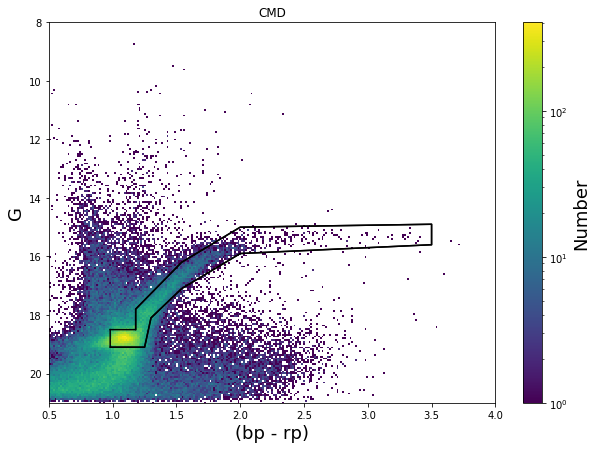

In [88]:

plt.figure(figsize=(10,7))


plt.hist2d(lmc_gaia_catalog_source_10deg_dec53['phot_bp_mean_mag'] - lmc_gaia_catalog_source_10deg_dec53['phot_rp_mean_mag'], 
          lmc_gaia_catalog_source_10deg_dec53['phot_g_mean_mag'], range=None, bins=220, cmap='viridis', norm=LogNorm(), cmin=1)

cbar = plt.colorbar(mappable=None, cax=None, ax=None)
plt.xlabel('(bp - rp)', fontsize=18)
plt.ylabel('G', fontsize=18)
plt.xlim(0.5,4)
plt.ylim(8,21)
plt.gca().invert_yaxis()

x_vals = ([0.98, 0.98], [0.98, 1.25], [1.25, 1.3], [1.3, 1.54], [1.54, 2], [2, 3.5], 
          [3.5, 3.5], [3.5, 2], [2, 1.54], [1.54, 1.18], [1.18, 1.18], [1.18, 0.98])

y_vals = ([18.5, 19.1], [19.1, 19.1], [19.1, 18.1], [18.1, 17.1], [17.1, 15.9], [15.9, 15.6],
          [15.6, 14.9], [14.9, 15], [15, 16.2], [16.2, 17.8], [17.8, 18.5], [18.5, 18.5])

plt.plot(x_vals, y_vals, "BLACK")

# plt.plot([1.25,1.25], [12.5,14.5],"BLACK", [1.25,1.45], [14.5,14.5], "BLACK",
#         [1.45,1.6], [14.5,13], "BLACK", [1.6,1.8], [13,12.75], "BLACK", [1.8,3], [12.75,12.75], "BLACK", 
#         [3,3], [12.75,11], "BLACK", [3,1.7], [11,11], "BLACK", [1.7,1.25], [11,12.5], "BLACK" )

# coord = [[1,1], [2,1], [2,2], [1,2], [0.5,1.5]]
# coord.append(coord[0]) #repeat the first point to create a 'closed loop'

# xs, ys = zip(*coord) #create lists of x and y values

# plt.figure()
# plt.plot(xs,ys) 
plt.title("CMD")
cbar.set_label('Number', fontsize=18)
plt.show()

In [89]:
xcut = [0.98, 0.98, 1.25, 1.30, 1.54, 2.0, 3.5, 3.5, 3.5, 2, 1.54, 1.18, 1.18, 0.98]
ycut = [18.5, 19.1, 19.1, 18.1, 17.1, 15.9, 15.6, 14.9, 14.9, 15, 16.2, 17.8, 18.5, 18.5]
xdata = (lmc_gaia_catalog_source_10deg_dec53['phot_bp_mean_mag']
         - lmc_gaia_catalog_source_10deg_dec53['phot_rp_mean_mag'])
ydata = lmc_gaia_catalog_source_10deg_dec53['phot_g_mean_mag']
ind, cutind = dln.roi_cut(xcut, ycut, xdata.data, ydata.data)

In [90]:
RGB_CMD_cut = lmc_gaia_catalog_source_10deg_dec53[cutind]
leftover = lmc_gaia_catalog_source_10deg_dec53[ind]
print(len(RGB_CMD_cut))
print(len(leftover))
print(len(cutind))
print(len(ind))

37234
72775
37234
72775


# Check to make sure CMD cut worked

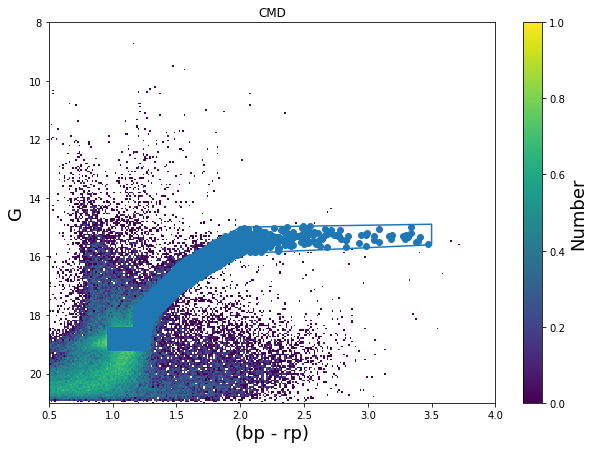

In [91]:
plt.figure(figsize=(10,7))


plt.hist2d(lmc_gaia_catalog_source_10deg_dec53['phot_bp_mean_mag'] - lmc_gaia_catalog_source_10deg_dec53['phot_rp_mean_mag'], 
          lmc_gaia_catalog_source_10deg_dec53['phot_g_mean_mag'], range=None, bins=250, cmap='viridis', norm=LogNorm(), cmin=1)

plt.scatter(RGB_CMD_cut['phot_bp_mean_mag'] - RGB_CMD_cut['phot_rp_mean_mag'], 
          RGB_CMD_cut['phot_g_mean_mag'])


plt.plot(xcut, ycut)

cbar = plt.colorbar(mappable=None, cax=None, ax=None)
plt.xlabel('(bp - rp)', fontsize=18)
plt.ylabel('G', fontsize=18)
plt.xlim(0.5,4)
plt.ylim(8,21)
plt.gca().invert_yaxis()

# x_vals = ([0.95,0.95], [0.95, 1.275], [1.275, 1.275], [1.275, 1.6], [1.6, 2], [2, 3.5], 
#           [3.5, 3.5], [3.5, 2], [2, 1.5], [1.5, 1.125], [1.125, 1.125], [1.125, 0.95] )
# y_vals = ([18.5, 19.25], [19.25, 19.25], [19.25, 18.5], [18.5, 17], [17, 16], [16, 15.5],
#           [15.5, 14.75], [14.75, 14.75], [14.75, 15.9], [15.9, 17.8], [17.8, 18.5], [18.5, 18.5] )

# plt.plot(x_vals, y_vals, "BLACK")

# plt.plot([1.25,1.25], [12.5,14.5],"BLACK", [1.25,1.45], [14.5,14.5], "BLACK",
#         [1.45,1.6], [14.5,13], "BLACK", [1.6,1.8], [13,12.75], "BLACK", [1.8,3], [12.75,12.75], "BLACK", 
#         [3,3], [12.75,11], "BLACK", [3,1.7], [11,11], "BLACK", [1.7,1.25], [11,12.5], "BLACK" )

# coord = [[1,1], [2,1], [2,2], [1,2], [0.5,1.5]]
# coord.append(coord[0]) #repeat the first point to create a 'closed loop'

# xs, ys = zip(*coord) #create lists of x and y values

# plt.figure()
# plt.plot(xs,ys) 
plt.title("CMD")
cbar.set_label('Number', fontsize=18)
plt.show()

# Check to make sure pmdist cut worked

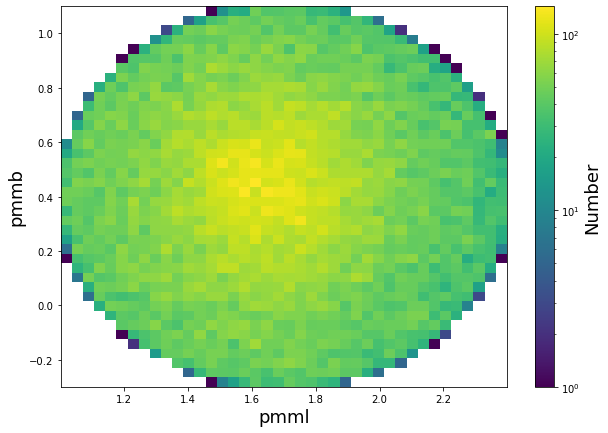

In [10]:
plt.figure(figsize=(10,7))

leftover = lmc_gaia_catalog_source_10deg_dec53[ind]

plt.hist2d(leftover['pmml'], leftover['pmmb'],
           range=None, bins=40, cmap='viridis', norm=LogNorm(), cmin=None)

cbar = plt.colorbar(mappable=None, cax=None, ax=None)

plt.xlabel('pmml', fontsize=18)
plt.ylabel('pmmb', fontsize=18)
# plt.xlim(-3,6.5)
# plt.ylim(-2.5,3)
cbar.set_label('Number', fontsize=18)
plt.show()

# hist2d() plots of how RC and RGB stars pmmb and pmml change in mlon and mlat

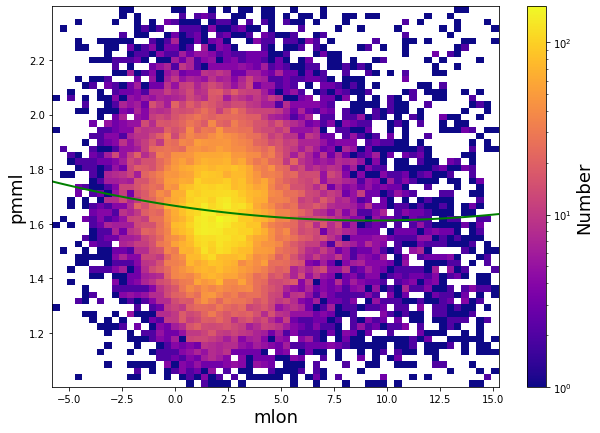

In [11]:
plt.figure(figsize=(10,7))


plt.hist2d(RGB_CMD_cut['mlon'], RGB_CMD_cut['pmml'],
           range=None, bins=60, cmap='plasma', norm=LogNorm(), cmin=None)

cbar = plt.colorbar(mappable=None, cax=None, ax=None)

model1 = np.poly1d(np.polyfit(RGB_CMD_cut['mlon'], RGB_CMD_cut['pmml'] , 2))
polyline = np.linspace(-6, 16, 100)
plt.plot(polyline, model1(polyline), color='green', lw=2)

plt.xlabel('mlon', fontsize=18)
plt.ylabel('pmml', fontsize=18)
# plt.xlim(-3,6.5)
# plt.ylim(-2.5,3)
cbar.set_label('Number', fontsize=18)
plt.show()

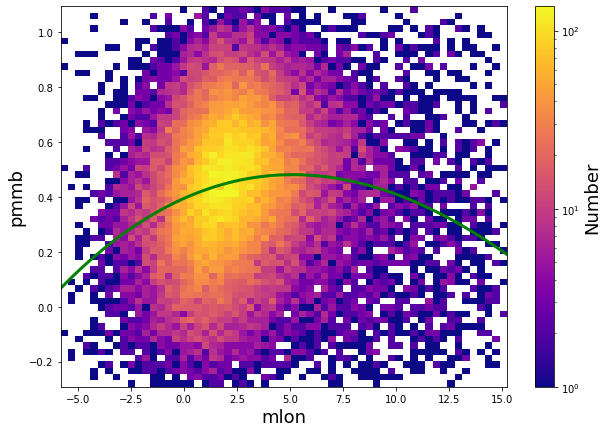

In [12]:
plt.figure(figsize=(10,7))


plt.hist2d(RGB_CMD_cut['mlon'], RGB_CMD_cut['pmmb'],
           range=None, bins=60, cmap='plasma', norm=LogNorm(), cmin=None)

cbar = plt.colorbar(mappable=None, cax=None, ax=None)

model1 = np.poly1d(np.polyfit(RGB_CMD_cut['mlon'], RGB_CMD_cut['pmmb'] , 3))
polyline = np.linspace(-6, 16, 100)
plt.plot(polyline, model1(polyline), color='green',lw=3)

plt.xlabel('mlon', fontsize=18)
plt.ylabel('pmmb', fontsize=18)
# plt.xlim(-3,6.5)
# plt.ylim(-2.5,3)
cbar.set_label('Number', fontsize=18)
plt.show()

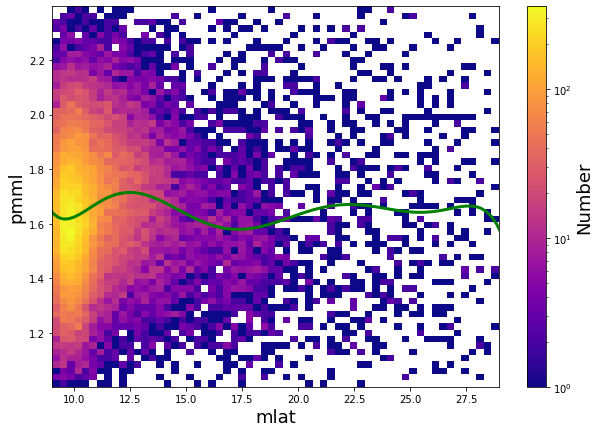

In [13]:
plt.figure(figsize=(10,7))


plt.hist2d(RGB_CMD_cut['mlat'], RGB_CMD_cut['pmml'],
           range=None, bins=60, cmap='plasma', norm=LogNorm(), cmin=None)

cbar = plt.colorbar(mappable=None, cax=None, ax=None)

model1 = np.poly1d(np.polyfit(RGB_CMD_cut['mlat'], RGB_CMD_cut['pmml'] , 7))
polyline = np.linspace(7, 30, 100)
plt.plot(polyline, model1(polyline), color='green',lw=3)

plt.xlabel('mlat', fontsize=18)
plt.ylabel('pmml', fontsize=18)
# plt.xlim(-3,6.5)
# plt.ylim(-2.5,3)
cbar.set_label('Number', fontsize=18)
plt.show()

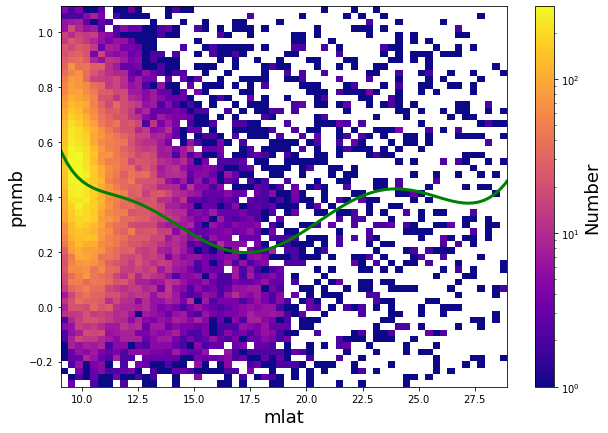

In [14]:
plt.figure(figsize=(10,7))


plt.hist2d(RGB_CMD_cut['mlat'], RGB_CMD_cut['pmmb'],
           range=None, bins=60, cmap='plasma', norm=LogNorm(), cmin=None)

cbar = plt.colorbar(mappable=None, cax=None, ax=None)

model1 = np.poly1d(np.polyfit(RGB_CMD_cut['mlat'], RGB_CMD_cut['pmmb'] , 7))
polyline = np.linspace(7, 30, 100)
plt.plot(polyline, model1(polyline), color='green',lw=3)

plt.xlabel('mlat', fontsize=18)
plt.ylabel('pmmb', fontsize=18)
# plt.xlim(5,30)
# plt.ylim(-2.5,3)
cbar.set_label('Number', fontsize=18)
plt.show()

# Normalized binned_statistic_2d() (wrt to total number in each column) of pmml & pmmb wrt mlon and mlat

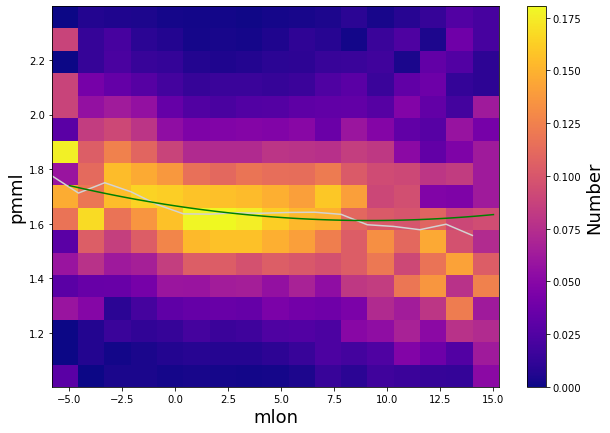

In [15]:
from scipy.stats import binned_statistic, binned_statistic_2d

plt.figure(figsize=(10,7))

result,xedge,yedge,binnumber = binned_statistic_2d(RGB_CMD_cut['mlon'], RGB_CMD_cut['pmml'], RGB_CMD_cut['pmml'],
                statistic = "count", bins=17)

colsum = np.sum(result, axis= 1)
result2 = result/colsum.reshape(-1,1)

plt.imshow(result2.T,extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]], origin="lower", aspect="auto", cmap="plasma")

# plt.hist2d(RGB_CMD_cut['mlon'], RGB_CMD_cut['pmml'],
#            range=None, bins=40, cmap='plasma', norm=LogNorm(), cmin=3)

cbar = plt.colorbar(mappable=None, cax=None, ax=None)


result,xedge,binnumber = binned_statistic(RGB_CMD_cut['mlon'], RGB_CMD_cut['pmml'],
                statistic = "mean", bins=17)
plt.plot(xedge[:-1],result.T, c='lightgray')


model2 = np.poly1d(np.polyfit(RGB_CMD_cut['mlon'], RGB_CMD_cut['pmml'] , 2))
polyline = np.linspace(-5, 15, 100)
plt.plot(polyline, model2(polyline), color='green')

# plt.xlim(15,-5)
plt.xlabel('mlon', fontsize=18)
plt.ylabel('pmml', fontsize=18)
# plt.xlim(1,2.5)
# plt.ylim(-0.3,1.1)
cbar.set_label('Number', fontsize=18)
plt.show()

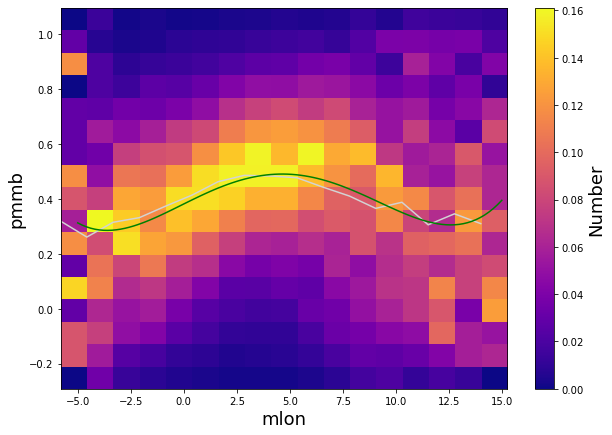

In [16]:
from scipy.stats import binned_statistic, binned_statistic_2d

plt.figure(figsize=(10,7))

result,xedge,yedge,binnumber = binned_statistic_2d(RGB_CMD_cut['mlon'], RGB_CMD_cut['pmmb'], RGB_CMD_cut['pmmb'],
                statistic = "count", bins=17)

colsum = np.sum(result, axis= 1)
result2 = result/colsum.reshape(-1,1)

plt.imshow(result2.T,extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]], origin="lower", aspect="auto", cmap="plasma")

# plt.hist2d(RGB_CMD_cut['mlon'], RGB_CMD_cut['pmml'],
#            range=None, bins=40, cmap='plasma', norm=LogNorm(), cmin=3)

cbar = plt.colorbar(mappable=None, cax=None, ax=None)


result,xedge,binnumber = binned_statistic(RGB_CMD_cut['mlon'], RGB_CMD_cut['pmmb'],
                statistic = "mean", bins=17)
plt.plot(xedge[:-1],result.T, c='lightgray')

model2 = np.poly1d(np.polyfit(RGB_CMD_cut['mlon'], RGB_CMD_cut['pmmb'] , 4))

# result2 = result.copy()
polyline = np.linspace(-5, 15, 100)
plt.plot(polyline, model2(polyline), color='green')


plt.xlabel('mlon', fontsize=18)
plt.ylabel('pmmb', fontsize=18)
# plt.xlim(1,2.5)
# plt.ylim(-0.3,1.1)
cbar.set_label('Number', fontsize=18)
plt.show()

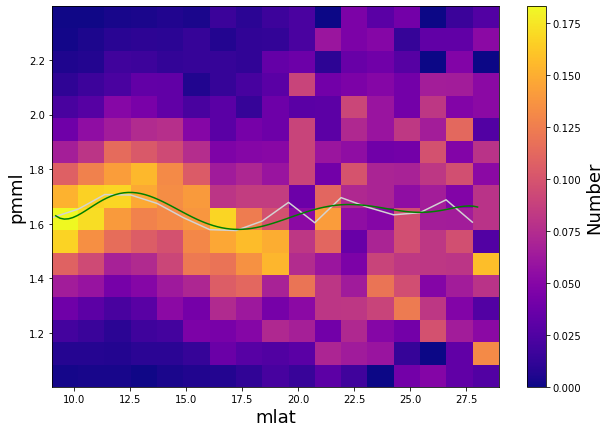

In [17]:
from scipy.stats import binned_statistic, binned_statistic_2d

plt.figure(figsize=(10,7))

result,xedge,yedge,binnumber = binned_statistic_2d(RGB_CMD_cut['mlat'], RGB_CMD_cut['pmml'], RGB_CMD_cut['pmml'],
                statistic = "count", bins=17)

colsum = np.sum(result, axis= 1)
result2 = result/colsum.reshape(-1,1)

plt.imshow(result2.T,extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]], origin="lower", aspect="auto", cmap="plasma")

# plt.hist2d(RGB_CMD_cut['mlon'], RGB_CMD_cut['pmml'],
#            range=None, bins=40, cmap='plasma', norm=LogNorm(), cmin=3)

cbar = plt.colorbar(mappable=None, cax=None, ax=None)


result,xedge,binnumber = binned_statistic(RGB_CMD_cut['mlat'], RGB_CMD_cut['pmml'],
                statistic = "mean", bins=17)
plt.plot(xedge[:-1],result.T, c='lightgray')

model2 = np.poly1d(np.polyfit(RGB_CMD_cut['mlat'], RGB_CMD_cut['pmml'] , 7))

# result2 = result.copy()
polyline = np.linspace(9.2, 28, 100)
plt.plot(polyline, model2(polyline), color='green')

# plt.xlim(15,-5)
plt.xlabel('mlat', fontsize=18)
plt.ylabel('pmml', fontsize=18)
# plt.xlim(1,2.5)
# plt.ylim(-0.3,1.1)
cbar.set_label('Number', fontsize=18)
plt.show()

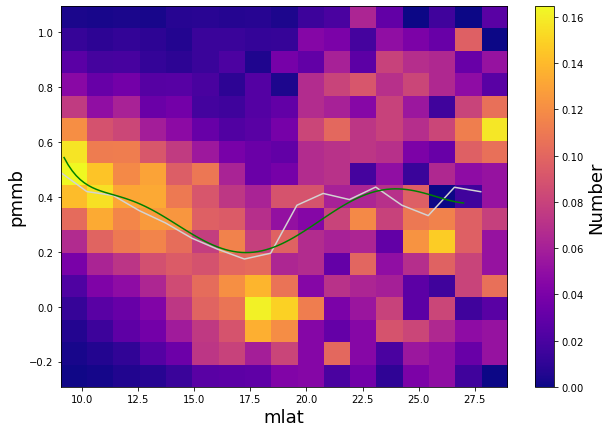

In [18]:
from scipy.stats import binned_statistic, binned_statistic_2d

plt.figure(figsize=(10,7))

result,xedge,yedge,binnumber = binned_statistic_2d(RGB_CMD_cut['mlat'], RGB_CMD_cut['pmmb'], RGB_CMD_cut['pmmb'],
                statistic = "count", bins=17)

colsum = np.sum(result, axis= 1)
result2 = result/colsum.reshape(-1,1)

plt.imshow(result2.T,extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]], origin="lower", aspect="auto", cmap="plasma")

# plt.hist2d(RGB_CMD_cut['mlon'], RGB_CMD_cut['pmml'],
#            range=None, bins=40, cmap='plasma', norm=LogNorm(), cmin=3)

cbar = plt.colorbar(mappable=None, cax=None, ax=None)


result,xedge,binnumber = binned_statistic(RGB_CMD_cut['mlat'], RGB_CMD_cut['pmmb'],
                statistic = "mean", bins=17)
plt.plot(xedge[:-1],result.T, c='lightgray')


model2 = np.poly1d(np.polyfit(RGB_CMD_cut['mlat'], RGB_CMD_cut['pmmb'] , 7))
# result2 = result.copy()
polyline = np.linspace(9.2, 27, 100)
plt.plot(polyline, model2(polyline), color='green')


# plt.xlim(15,-5)
plt.xlabel('mlat', fontsize=18)
plt.ylabel('pmmb', fontsize=18)
# plt.xlim(1,2.5)
# plt.ylim(-0.3,1.1)
cbar.set_label('Number', fontsize=18)
plt.show()

# Comparing Model PM's to PM's measured my Gaia (in RA and DEC)

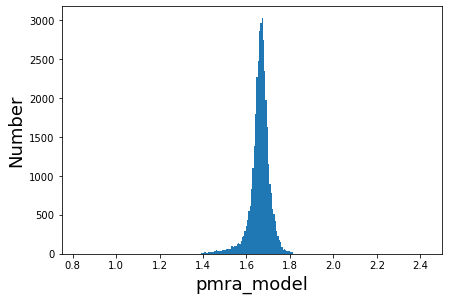

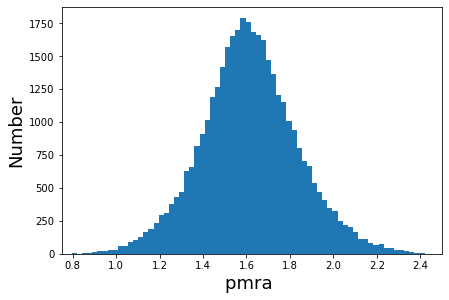

In [22]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.hist(RGB_CMD_cut['pmra_model'], bins=70)
plt.xlabel('pmra_model', fontsize=18)
plt.ylabel('Number', fontsize=18)
plt.xlim(0.75,2.5)
plt.show()

plt.figure(figsize=(15,10))
plt.subplot(2,2,2)
plt.hist(RGB_CMD_cut['pmra'], bins=70)
plt.xlabel('pmra ', fontsize=18)
plt.ylabel('Number', fontsize=18)
plt.xlim(0.75,2.5)
plt.show()

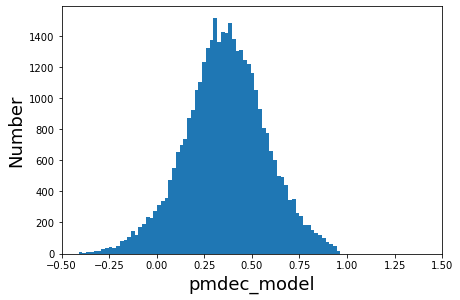

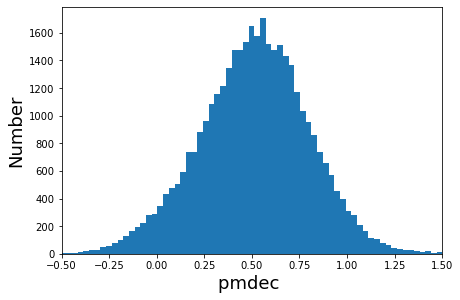

In [23]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.hist(RGB_CMD_cut['pmdec_model'], bins=70)
plt.xlabel('pmdec_model', fontsize=18)
plt.ylabel('Number', fontsize=18)
plt.xlim(-0.5,1.5)
plt.show()

plt.figure(figsize=(15,10))
plt.subplot(2,2,2)
plt.hist(RGB_CMD_cut['pmdec'], bins=70)
plt.xlabel('pmdec ', fontsize=18)
plt.ylabel('Number', fontsize=18)
plt.xlim(-0.5,1.5)
plt.show()

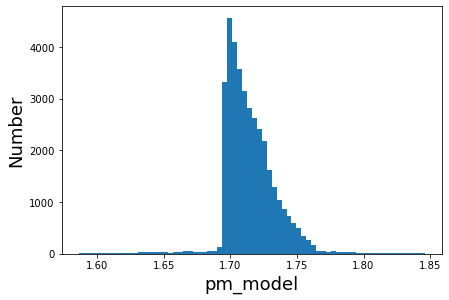

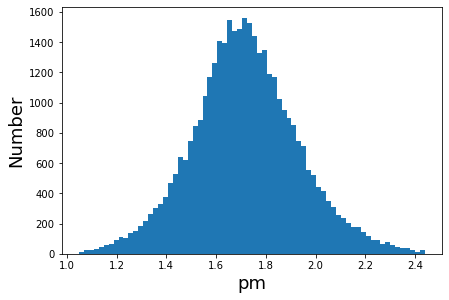

In [24]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.hist(RGB_CMD_cut['pm_model'], bins=70)
plt.xlabel('pm_model', fontsize=18)
plt.ylabel('Number', fontsize=18)
# plt.xlim(-0.5,1.5)
plt.show()

plt.figure(figsize=(15,10))
plt.subplot(2,2,2)
plt.hist(RGB_CMD_cut['pm'], bins=70)
plt.xlabel('pm', fontsize=18)
plt.ylabel('Number', fontsize=18)
# plt.xlim(-0.5,1.5)
plt.show()

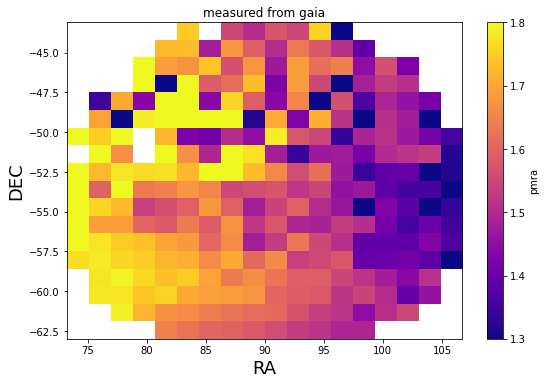

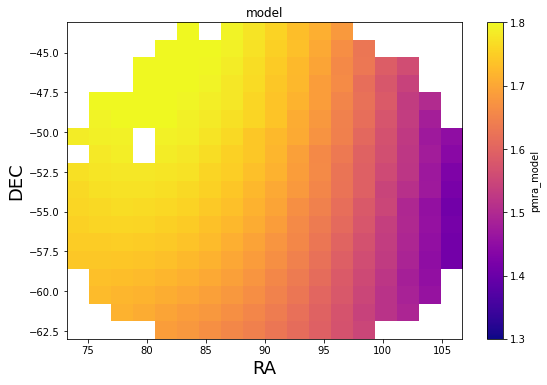

In [25]:
from scipy.stats import binned_statistic_2d

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
result1,xedge,yedge,binnumber = binned_statistic_2d(RGB_CMD_cut['ra'], RGB_CMD_cut['dec'],
                RGB_CMD_cut['pmra'], statistic = "mean", bins=18)
plt.imshow(result1.T,extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]], origin="lower", aspect="auto", cmap="plasma", vmin =1.3 , vmax=1.8)
plt.colorbar(label='pmra')
plt.title("measured from gaia")
plt.xlabel('RA', fontsize=18)
plt.ylabel('DEC', fontsize=18)
plt.tight_layout()
plt.show()



plt.figure(figsize=(15,10))
plt.subplot(2,2,2)
result2,xedge,yedge,binnumber = binned_statistic_2d(RGB_CMD_cut['ra'], RGB_CMD_cut['dec'],
                RGB_CMD_cut['pmra_model'], statistic = "mean", bins=18)
plt.imshow(result2.T,extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]], origin="lower", aspect="auto", cmap="plasma", vmin =1.3 , vmax=1.8)
plt.colorbar(label='pmra_model')
plt.title("model")
plt.xlabel('RA', fontsize=18)
plt.ylabel('DEC', fontsize=18)
plt.tight_layout()
plt.show()

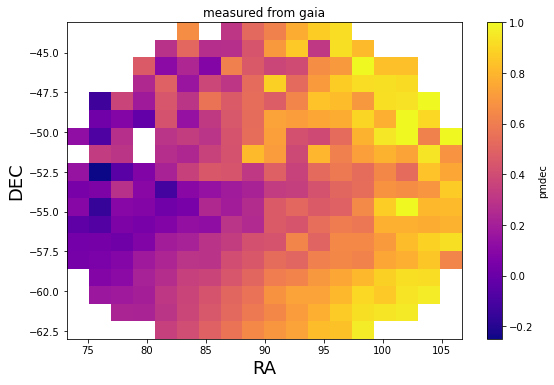

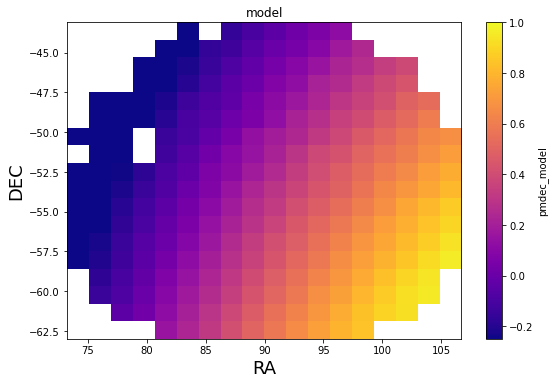

In [26]:
from scipy.stats import binned_statistic_2d

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
result1,xedge,yedge,binnumber = binned_statistic_2d(RGB_CMD_cut['ra'], RGB_CMD_cut['dec'],
                RGB_CMD_cut['pmdec'], statistic = "mean", bins=18)
plt.imshow(result1.T,extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]], origin="lower", aspect="auto", cmap="plasma", vmin=-0.25 ,vmax=1)
plt.colorbar(label='pmdec')
plt.title("measured from gaia")
plt.xlabel('RA', fontsize=18)
plt.ylabel('DEC', fontsize=18)
plt.tight_layout()
plt.show()



plt.figure(figsize=(15,10))
plt.subplot(2,2,2)
result2,xedge,yedge,binnumber = binned_statistic_2d(RGB_CMD_cut['ra'], RGB_CMD_cut['dec'],
                RGB_CMD_cut['pmdec_model'], statistic = "mean", bins=18)
plt.imshow(result2.T,extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]], origin="lower", aspect="auto", cmap="plasma", vmin=-0.25 ,vmax=1)
plt.colorbar(label='pmdec_model')
plt.title("model")
plt.xlabel('RA', fontsize=18)
plt.ylabel('DEC', fontsize=18)
plt.tight_layout()
plt.show()

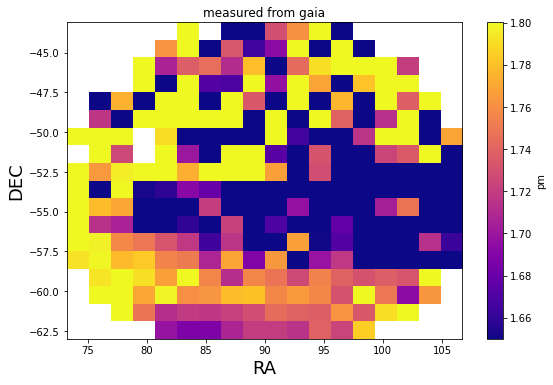

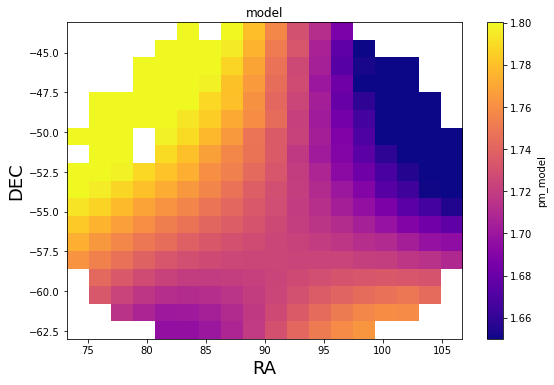

In [27]:
from scipy.stats import binned_statistic_2d

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
result1,xedge,yedge,binnumber = binned_statistic_2d(RGB_CMD_cut['ra'], RGB_CMD_cut['dec'],
                RGB_CMD_cut['pm'], statistic = "mean", bins=18)
plt.imshow(result1.T,extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]], origin="lower", aspect="auto", cmap="plasma", vmin=1.65 ,vmax=1.8)
plt.colorbar(label='pm')
plt.title("measured from gaia")
plt.xlabel('RA', fontsize=18)
plt.ylabel('DEC', fontsize=18)
plt.tight_layout()
plt.show()



plt.figure(figsize=(15,10))
plt.subplot(2,2,2)
result2,xedge,yedge,binnumber = binned_statistic_2d(RGB_CMD_cut['ra'], RGB_CMD_cut['dec'],
                RGB_CMD_cut['pm_model'], statistic = "mean", bins=18)
plt.imshow(result2.T,extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]], origin="lower", aspect="auto", cmap="plasma", vmin=1.65 ,vmax=1.8)
plt.colorbar(label='pm_model')
plt.title("model")
plt.xlabel('RA', fontsize=18)
plt.ylabel('DEC', fontsize=18)
plt.tight_layout()
plt.show()

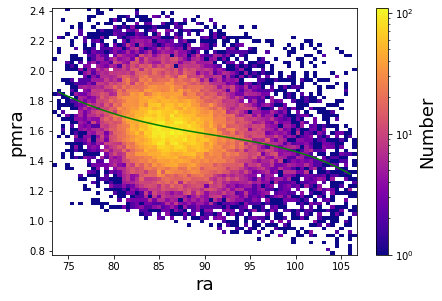

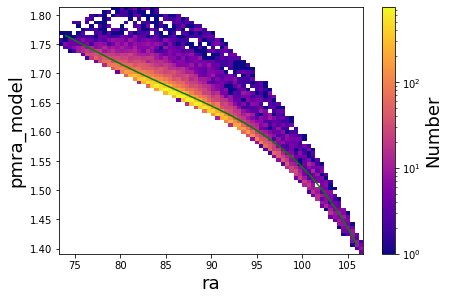

In [28]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.hist2d(RGB_CMD_cut['ra'], RGB_CMD_cut['pmra'],
           range=None, bins=70, cmap='plasma', norm=LogNorm(), cmin=None)

cbar = plt.colorbar(mappable=None, cax=None, ax=None)

model1 = np.poly1d(np.polyfit(RGB_CMD_cut['ra'], RGB_CMD_cut['pmra'] , 4))
polyline = np.linspace(74, 106, 100)
plt.plot(polyline, model1(polyline), color='green')
plt.xlabel('ra', fontsize=18)
plt.ylabel('pmra', fontsize=18)
# plt.xlim(-3,6.5)
# plt.ylim(0.8,2.4)
cbar.set_label('Number', fontsize=18)
plt.show()


plt.figure(figsize=(15,10))

plt.subplot(2,2,2)
plt.hist2d(RGB_CMD_cut['ra'], RGB_CMD_cut['pmra_model'],
           range=None, bins=70, cmap='plasma', norm=LogNorm(), cmin=None)

cbar = plt.colorbar(mappable=None, cax=None, ax=None)

model2 = np.poly1d(np.polyfit(RGB_CMD_cut['ra'], RGB_CMD_cut['pmra_model'] , 4))
polyline1 = np.linspace(74, 106, 100)
plt.plot(polyline1, model2(polyline1), color='green')
plt.xlabel('ra', fontsize=18)
plt.ylabel('pmra_model', fontsize=18)
# plt.xlim(-3,6.5)
# plt.ylim(0.8,2.4)
cbar.set_label('Number', fontsize=18)
plt.show()

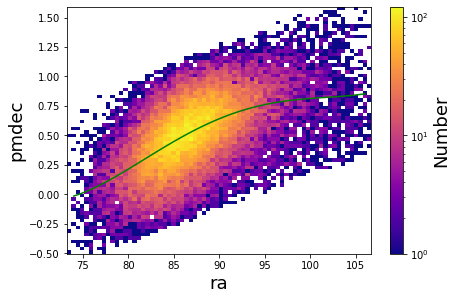

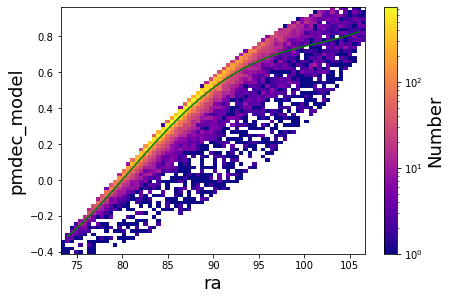

In [29]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.hist2d(RGB_CMD_cut['ra'], RGB_CMD_cut['pmdec'],
           range=None, bins=70, cmap='plasma', norm=LogNorm(), cmin=None)

cbar = plt.colorbar(mappable=None, cax=None, ax=None)

model1 = np.poly1d(np.polyfit(RGB_CMD_cut['ra'], RGB_CMD_cut['pmdec'] , 4))
polyline = np.linspace(74, 106, 100)
plt.plot(polyline, model1(polyline), color='green')
plt.xlabel('ra', fontsize=18)
plt.ylabel('pmdec', fontsize=18)
# plt.xlim(-3,6.5)
# plt.ylim(-2.5,3)
cbar.set_label('Number', fontsize=18)
plt.show()


plt.figure(figsize=(15,10))

plt.subplot(2,2,2)
plt.hist2d(RGB_CMD_cut['ra'], RGB_CMD_cut['pmdec_model'],
           range=None, bins=70, cmap='plasma', norm=LogNorm(), cmin=None)

cbar = plt.colorbar(mappable=None, cax=None, ax=None)

model2 = np.poly1d(np.polyfit(RGB_CMD_cut['ra'], RGB_CMD_cut['pmdec_model'] , 4))
polyline1 = np.linspace(74, 106, 100)
plt.plot(polyline1, model2(polyline1), color='green')
plt.xlabel('ra', fontsize=18)
plt.ylabel('pmdec_model', fontsize=18)
# plt.xlim(-3,6.5)
# plt.ylim(-2.5,3)
cbar.set_label('Number', fontsize=18)
plt.show()

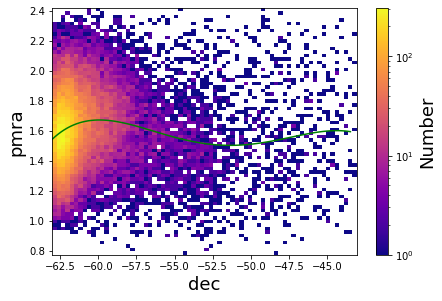

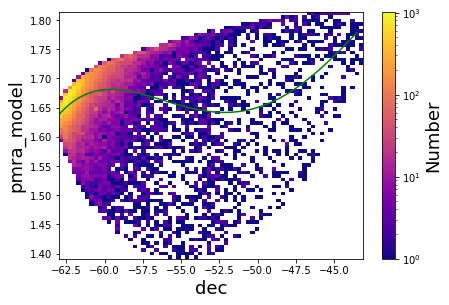

In [30]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.hist2d(RGB_CMD_cut['dec'], RGB_CMD_cut['pmra'],
           range=None, bins=70, cmap='plasma', norm=LogNorm(), cmin=None)

cbar = plt.colorbar(mappable=None, cax=None, ax=None)

model1 = np.poly1d(np.polyfit(RGB_CMD_cut['dec'], RGB_CMD_cut['pmra'] , 4))
polyline = np.linspace(-63, -43.5, 100)
plt.plot(polyline, model1(polyline), color='green')
plt.xlabel('dec', fontsize=18)
plt.ylabel('pmra', fontsize=18)
# plt.xlim(-3,6.5)
# plt.ylim(-2.5,3)
cbar.set_label('Number', fontsize=18)
plt.show()


plt.figure(figsize=(15,10))

plt.subplot(2,2,2)
plt.hist2d(RGB_CMD_cut['dec'], RGB_CMD_cut['pmra_model'],
           range=None, bins=70, cmap='plasma', norm=LogNorm(), cmin=None)

cbar = plt.colorbar(mappable=None, cax=None, ax=None)

model2 = np.poly1d(np.polyfit(RGB_CMD_cut['dec'], RGB_CMD_cut['pmra_model'] , 4))
polyline1 = np.linspace(-63, -43.5, 100)
plt.plot(polyline1, model2(polyline1), color='green')
plt.xlabel('dec', fontsize=18)
plt.ylabel('pmra_model', fontsize=18)
# plt.xlim(-3,6.5)
# plt.ylim(-2.5,3)
cbar.set_label('Number', fontsize=18)
plt.show()

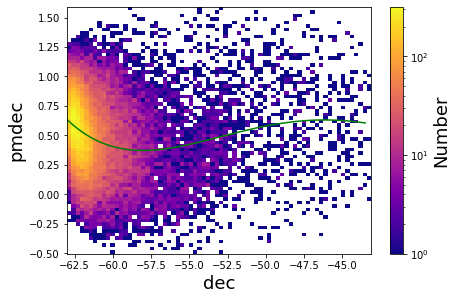

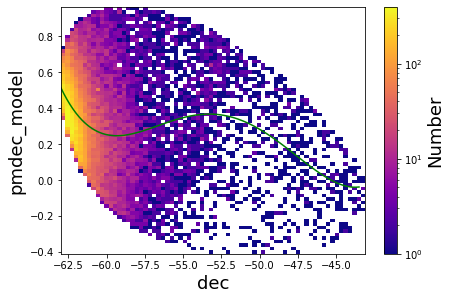

In [31]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.hist2d(RGB_CMD_cut['dec'], RGB_CMD_cut['pmdec'],
           range=None, bins=70, cmap='plasma', norm=LogNorm(), cmin=None)

cbar = plt.colorbar(mappable=None, cax=None, ax=None)

model1 = np.poly1d(np.polyfit(RGB_CMD_cut['dec'], RGB_CMD_cut['pmdec'] , 4))
polyline = np.linspace(-63, -43.5, 100)
plt.plot(polyline, model1(polyline), color='green')
plt.xlabel('dec', fontsize=18)
plt.ylabel('pmdec', fontsize=18)
# plt.xlim(-3,6.5)
# plt.ylim(-2.5,3)
cbar.set_label('Number', fontsize=18)
plt.show()


plt.figure(figsize=(15,10))

plt.subplot(2,2,2)
plt.hist2d(RGB_CMD_cut['dec'], RGB_CMD_cut['pmdec_model'],
           range=None, bins=70, cmap='plasma', norm=LogNorm(), cmin=None)

cbar = plt.colorbar(mappable=None, cax=None, ax=None)

model2 = np.poly1d(np.polyfit(RGB_CMD_cut['dec'], RGB_CMD_cut['pmdec_model'] , 4))
polyline1 = np.linspace(-63, -43.5, 100)
plt.plot(polyline1, model2(polyline1), color='green')
plt.xlabel('dec', fontsize=18)
plt.ylabel('pmdec_model', fontsize=18)
# plt.xlim(-3,6.5)
# plt.ylim(-2.5,3)
cbar.set_label('Number', fontsize=18)
plt.show()

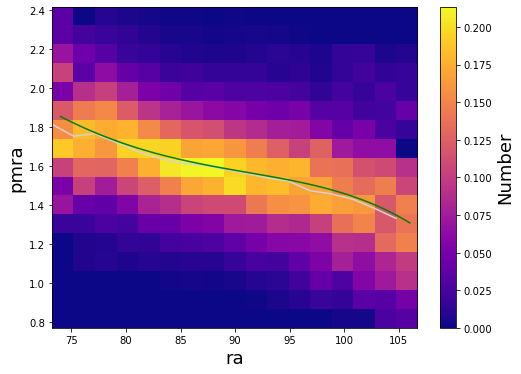

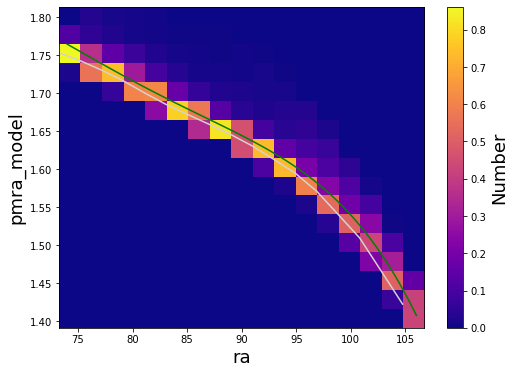

In [88]:
from scipy.stats import binned_statistic, binned_statistic_2d

plt.figure(figsize=(18,13))

plt.subplot(2,2,1)
result,xedge,yedge,binnumber = binned_statistic_2d(RGB_CMD_cut['ra'], RGB_CMD_cut['pmra'], RGB_CMD_cut['pmra'],
                statistic = "count", bins=17)

colsum = np.sum(result, axis= 1)
result2 = result/colsum.reshape(-1,1)

plt.imshow(result2.T,extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]], origin="lower", aspect="auto", cmap="plasma")

cbar = plt.colorbar(mappable=None, cax=None, ax=None)
result,xedge,binnumber = binned_statistic(RGB_CMD_cut['ra'], RGB_CMD_cut['pmra'],
                statistic = "mean", bins=17)
plt.plot(xedge[:-1],result, c='lightgray')

model2 = np.poly1d(np.polyfit(RGB_CMD_cut['ra'], RGB_CMD_cut['pmra'] , 4))
polyline = np.linspace(74, 106, 100)
plt.plot(polyline, model2(polyline), color='green')

# plt.xlim(15,-5)
plt.xlabel('ra', fontsize=18)
plt.ylabel('pmra', fontsize=18)
# plt.xlim(1,2.5)
# plt.ylim(-0.3,1.1)
cbar.set_label('Number', fontsize=18)
plt.show()



plt.figure(figsize=(18,13))
plt.subplot(2,2,2)
result2,xedge,yedge,binnumber = binned_statistic_2d(RGB_CMD_cut['ra'], RGB_CMD_cut['pmra_model'], RGB_CMD_cut['pmra_model'],
                statistic = "count", bins=17)

colsum1 = np.sum(result2, axis= 1)
result3 = result2/colsum1.reshape(-1,1)

plt.imshow(result3.T,extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]], origin="lower", aspect="auto", cmap="plasma")

cbar = plt.colorbar(mappable=None, cax=None, ax=None)
result,xedge,binnumber = binned_statistic(RGB_CMD_cut['ra'], RGB_CMD_cut['pmra_model'],
                statistic = "mean", bins=17)
plt.plot(xedge[:-1],result, c='lightgray')
model3 = np.poly1d(np.polyfit(RGB_CMD_cut['ra'], RGB_CMD_cut['pmra_model'] , 4))
polyline1 = np.linspace(74, 106, 100)
plt.plot(polyline1, model3(polyline1), color='green')

# plt.xlim(15,-5)
plt.xlabel('ra', fontsize=18)
plt.ylabel('pmra_model', fontsize=18)
# plt.xlim(1,2.5)
# plt.ylim(-0.3,1.1)
cbar.set_label('Number', fontsize=18)
plt.show()

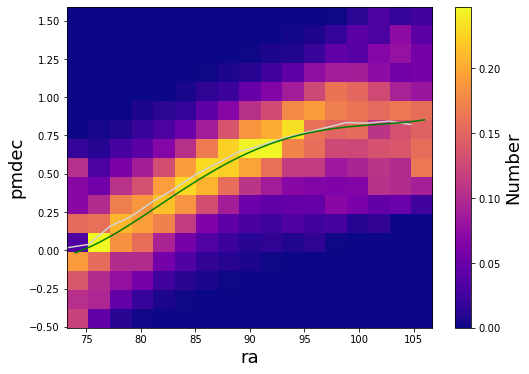

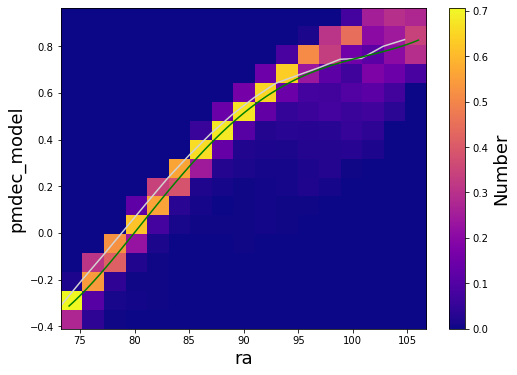

In [89]:
from scipy.stats import binned_statistic, binned_statistic_2d

plt.figure(figsize=(18,13))

plt.subplot(2,2,1)
result,xedge,yedge,binnumber = binned_statistic_2d(RGB_CMD_cut['ra'], RGB_CMD_cut['pmdec'], RGB_CMD_cut['pmdec'],
                statistic = "count", bins=17)

colsum = np.sum(result, axis= 1)
result2 = result/colsum.reshape(-1,1)

plt.imshow(result2.T,extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]], origin="lower", aspect="auto", cmap="plasma")

cbar = plt.colorbar(mappable=None, cax=None, ax=None)
result,xedge,binnumber = binned_statistic(RGB_CMD_cut['ra'], RGB_CMD_cut['pmdec'],
                statistic = "mean", bins=17)
plt.plot(xedge[:-1],result, c='lightgray')

model2 = np.poly1d(np.polyfit(RGB_CMD_cut['ra'], RGB_CMD_cut['pmdec'] , 4))
polyline = np.linspace(74, 106, 100)
plt.plot(polyline, model2(polyline), color='green')

# plt.xlim(15,-5)
plt.xlabel('ra', fontsize=18)
plt.ylabel('pmdec', fontsize=18)
# plt.xlim(1,2.5)
# plt.ylim(-0.3,1.1)
cbar.set_label('Number', fontsize=18)
plt.show()



plt.figure(figsize=(18,13))
plt.subplot(2,2,2)
result2,xedge,yedge,binnumber = binned_statistic_2d(RGB_CMD_cut['ra'], RGB_CMD_cut['pmdec_model'], RGB_CMD_cut['pmdec_model'],
                statistic = "count", bins=17)

colsum1 = np.sum(result2, axis= 1)
result3 = result2/colsum1.reshape(-1,1)

plt.imshow(result3.T,extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]], origin="lower", aspect="auto", cmap="plasma")

cbar = plt.colorbar(mappable=None, cax=None, ax=None)
result,xedge,binnumber = binned_statistic(RGB_CMD_cut['ra'], RGB_CMD_cut['pmdec_model'],
                statistic = "mean", bins=17)
plt.plot(xedge[:-1],result, c='lightgray')
model3 = np.poly1d(np.polyfit(RGB_CMD_cut['ra'], RGB_CMD_cut['pmdec_model'] , 4))
polyline1 = np.linspace(74, 106, 100)
plt.plot(polyline1, model3(polyline1), color='green')

# plt.xlim(15,-5)
plt.xlabel('ra', fontsize=18)
plt.ylabel('pmdec_model', fontsize=18)
# plt.xlim(1,2.5)
# plt.ylim(-0.3,1.1)
cbar.set_label('Number', fontsize=18)
plt.show()

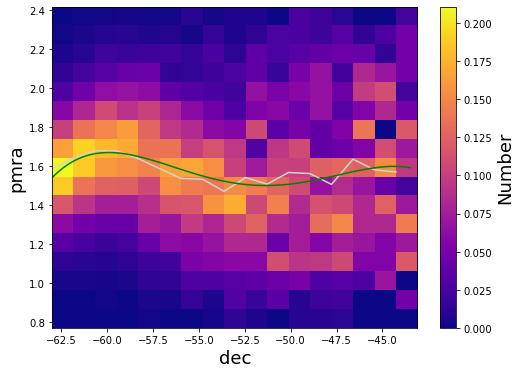

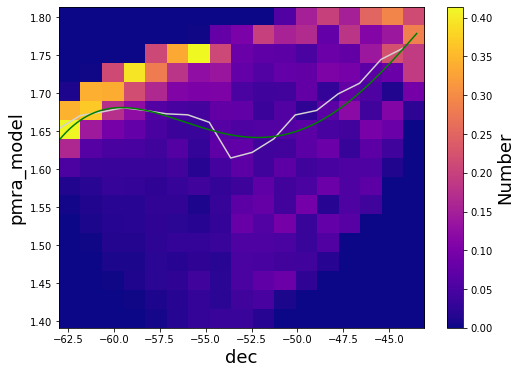

In [90]:
from scipy.stats import binned_statistic, binned_statistic_2d

plt.figure(figsize=(18,13))

plt.subplot(2,2,1)
result,xedge,yedge,binnumber = binned_statistic_2d(RGB_CMD_cut['dec'], RGB_CMD_cut['pmra'], RGB_CMD_cut['pmra'],
                statistic = "count", bins=17)

colsum = np.sum(result, axis= 1)
result2 = result/colsum.reshape(-1,1)

plt.imshow(result2.T,extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]], origin="lower", aspect="auto", cmap="plasma")

cbar = plt.colorbar(mappable=None, cax=None, ax=None)
result,xedge,binnumber = binned_statistic(RGB_CMD_cut['dec'], RGB_CMD_cut['pmra'],
                statistic = "mean", bins=17)
plt.plot(xedge[:-1],result, c='lightgray')

model2 = np.poly1d(np.polyfit(RGB_CMD_cut['dec'], RGB_CMD_cut['pmra'] , 4))
polyline = np.linspace(-63, -43.5, 100)
plt.plot(polyline, model2(polyline), color='green')

# plt.xlim(15,-5)
plt.xlabel('dec', fontsize=18)
plt.ylabel('pmra', fontsize=18)
# plt.xlim(1,2.5)
# plt.ylim(-0.3,1.1)
cbar.set_label('Number', fontsize=18)
plt.show()



plt.figure(figsize=(18,13))
plt.subplot(2,2,2)
result2,xedge,yedge,binnumber = binned_statistic_2d(RGB_CMD_cut['dec'], RGB_CMD_cut['pmra_model'], RGB_CMD_cut['pmra_model'],
                statistic = "count", bins=17)

colsum1 = np.sum(result2, axis= 1)
result3 = result2/colsum1.reshape(-1,1)

plt.imshow(result3.T,extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]], origin="lower", aspect="auto", cmap="plasma")

cbar = plt.colorbar(mappable=None, cax=None, ax=None)
result,xedge,binnumber = binned_statistic(RGB_CMD_cut['dec'], RGB_CMD_cut['pmra_model'],
                statistic = "mean", bins=17)
plt.plot(xedge[:-1],result, c='lightgray')
model3 = np.poly1d(np.polyfit(RGB_CMD_cut['dec'], RGB_CMD_cut['pmra_model'] , 4))
polyline1 = np.linspace(-63, -43.5, 100)
plt.plot(polyline1, model3(polyline1), color='green')

# plt.xlim(15,-5)
plt.xlabel('dec', fontsize=18)
plt.ylabel('pmra_model', fontsize=18)
# plt.xlim(1,2.5)
# plt.ylim(-0.3,1.1)
cbar.set_label('Number', fontsize=18)
plt.show()

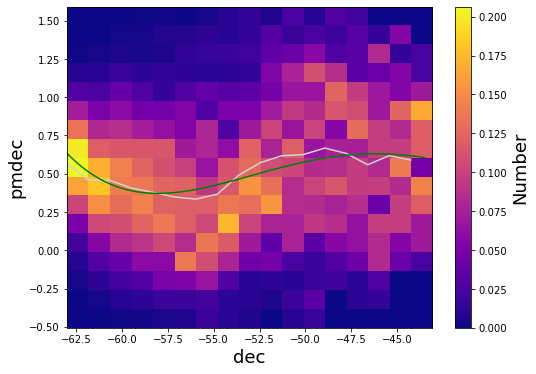

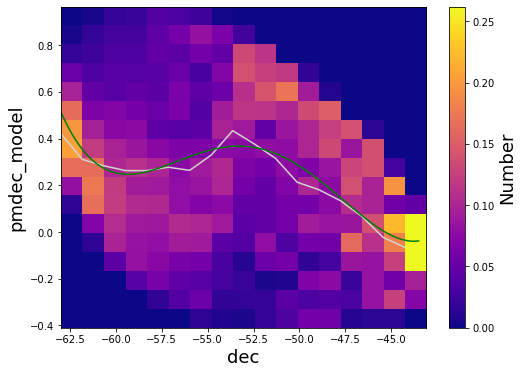

In [91]:
from scipy.stats import binned_statistic, binned_statistic_2d

plt.figure(figsize=(18,13))

plt.subplot(2,2,1)
result,xedge,yedge,binnumber = binned_statistic_2d(RGB_CMD_cut['dec'], RGB_CMD_cut['pmdec'], RGB_CMD_cut['pmdec'],
                statistic = "count", bins=17)

colsum = np.sum(result, axis= 1)
result2 = result/colsum.reshape(-1,1)

plt.imshow(result2.T,extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]], origin="lower", aspect="auto", cmap="plasma")

cbar = plt.colorbar(mappable=None, cax=None, ax=None)
result,xedge,binnumber = binned_statistic(RGB_CMD_cut['dec'], RGB_CMD_cut['pmdec'],
                statistic = "mean", bins=17)
plt.plot(xedge[:-1],result, c='lightgray')

model2 = np.poly1d(np.polyfit(RGB_CMD_cut['dec'], RGB_CMD_cut['pmdec'] , 4))
polyline = np.linspace(-63, -43.5, 100)
plt.plot(polyline, model2(polyline), color='green')

# plt.xlim(15,-5)
plt.xlabel('dec', fontsize=18)
plt.ylabel('pmdec', fontsize=18)
# plt.xlim(1,2.5)
# plt.ylim(-0.3,1.1)
cbar.set_label('Number', fontsize=18)
plt.show()



plt.figure(figsize=(18,13))
plt.subplot(2,2,2)
result2,xedge,yedge,binnumber = binned_statistic_2d(RGB_CMD_cut['dec'], RGB_CMD_cut['pmdec_model'], RGB_CMD_cut['pmdec_model'],
                statistic = "count", bins=17)

colsum1 = np.sum(result2, axis= 1)
result3 = result2/colsum1.reshape(-1,1)

plt.imshow(result3.T,extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]], origin="lower", aspect="auto", cmap="plasma")

cbar = plt.colorbar(mappable=None, cax=None, ax=None)
result,xedge,binnumber = binned_statistic(RGB_CMD_cut['dec'], RGB_CMD_cut['pmdec_model'],
                statistic = "mean", bins=17)
plt.plot(xedge[:-1],result, c='lightgray')
model3 = np.poly1d(np.polyfit(RGB_CMD_cut['dec'], RGB_CMD_cut['pmdec_model'] , 4))
polyline1 = np.linspace(-63, -43.5, 100)
plt.plot(polyline1, model3(polyline1), color='green')

# plt.xlim(15,-5)
plt.xlabel('dec', fontsize=18)
plt.ylabel('pmdec_model', fontsize=18)
# plt.xlim(1,2.5)
# plt.ylim(-0.3,1.1)
cbar.set_label('Number', fontsize=18)
plt.show()

# # Comparing Model PM's to PM's measured my Gaia (in mlon and mlat)

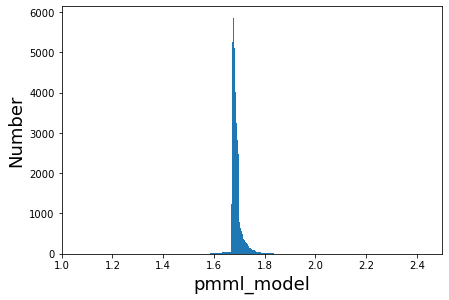

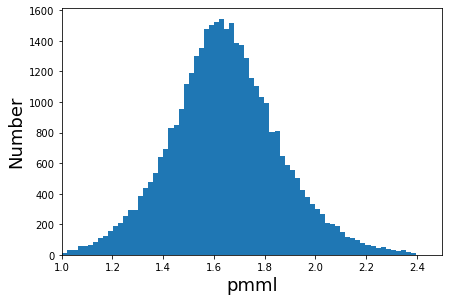

In [58]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.hist(RGB_CMD_cut['pmml_model'], bins=70)
plt.xlabel('pmml_model', fontsize=18)
plt.ylabel('Number', fontsize=18)
plt.xlim(1,2.5)
plt.show()

plt.figure(figsize=(15,10))
plt.subplot(2,2,2)
plt.hist(RGB_CMD_cut['pmml'], bins=70)
plt.xlabel('pmml', fontsize=18)
plt.ylabel('Number', fontsize=18)
plt.xlim(1,2.5)
plt.show()

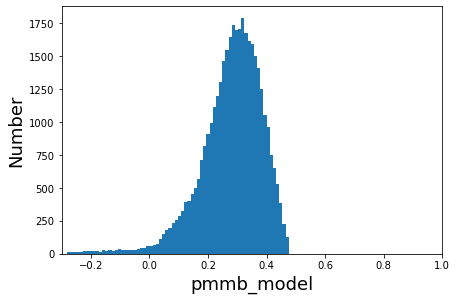

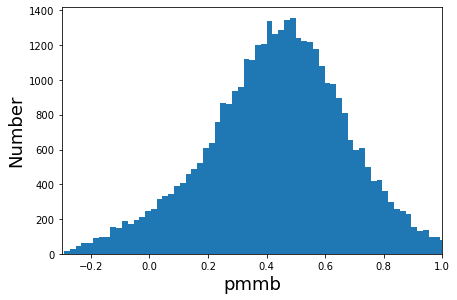

In [57]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.hist(RGB_CMD_cut['pmmb_model'], bins=70)
plt.xlabel('pmmb_model', fontsize=18)
plt.ylabel('Number', fontsize=18)
plt.xlim(-0.3,1)
plt.show()

plt.figure(figsize=(15,10))
plt.subplot(2,2,2)
plt.hist(RGB_CMD_cut['pmmb'], bins=70)
plt.xlabel('pmmb', fontsize=18)
plt.ylabel('Number', fontsize=18)
plt.xlim(-0.3,1)
plt.show()

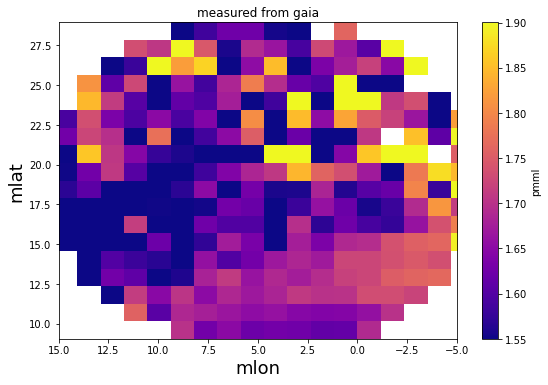

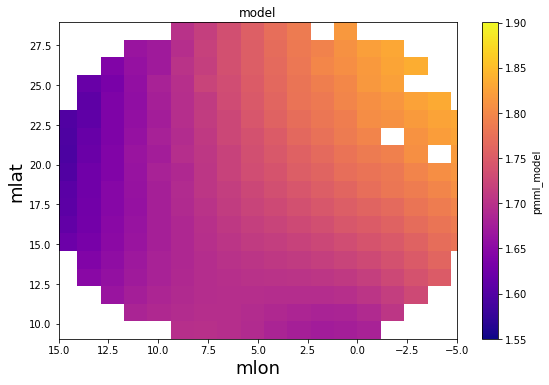

In [35]:
from scipy.stats import binned_statistic_2d

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
result1,xedge,yedge,binnumber = binned_statistic_2d(RGB_CMD_cut['mlon'], RGB_CMD_cut['mlat'],
                RGB_CMD_cut['pmml'], statistic = "mean", bins=18)
plt.imshow(result1.T,extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]], origin="lower", aspect="auto", cmap="plasma", vmin =1.55 , vmax=1.9)
plt.colorbar(label='pmml')
plt.title("measured from gaia")
plt.xlabel('mlon', fontsize=18)
plt.ylabel('mlat', fontsize=18)
plt.xlim(15,-5)
plt.tight_layout()
plt.show()



plt.figure(figsize=(15,10))
plt.subplot(2,2,2)
result2,xedge,yedge,binnumber = binned_statistic_2d(RGB_CMD_cut['mlon'], RGB_CMD_cut['mlat'],
                RGB_CMD_cut['pmml_model'], statistic = "mean", bins=18)
plt.imshow(result2.T,extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]], origin="lower", aspect="auto", cmap="plasma", vmin =1.55 , vmax=1.9)
plt.colorbar(label='pmml_model')
plt.title("model")
plt.xlabel('mlon', fontsize=18)
plt.ylabel('mlat', fontsize=18)
plt.xlim(15,-5)
plt.tight_layout()
plt.show()

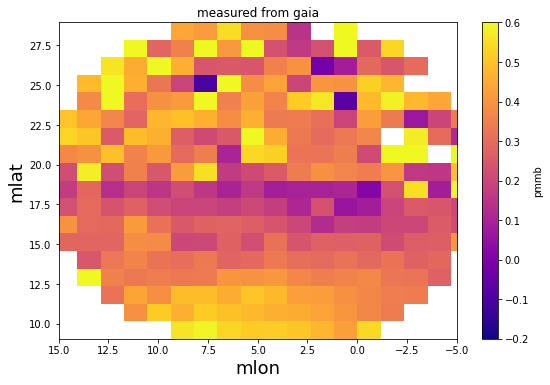

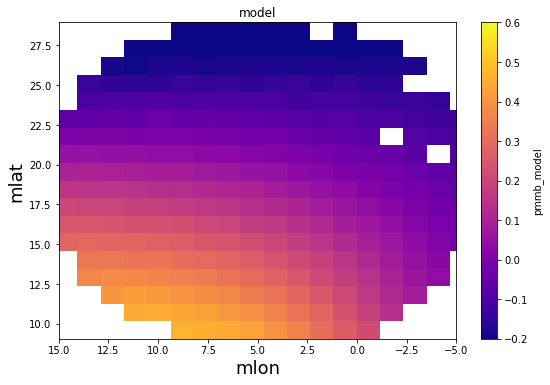

In [36]:
from scipy.stats import binned_statistic_2d

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
result1,xedge,yedge,binnumber = binned_statistic_2d(RGB_CMD_cut['mlon'], RGB_CMD_cut['mlat'],
                RGB_CMD_cut['pmmb'], statistic = "mean", bins=18)
plt.imshow(result1.T,extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]], origin="lower", aspect="auto", cmap="plasma", vmin =-0.2 , vmax=0.6)
plt.colorbar(label='pmmb')
plt.title("measured from gaia")
plt.xlabel('mlon', fontsize=18)
plt.ylabel('mlat', fontsize=18)
plt.xlim(15,-5)
plt.tight_layout()
plt.show()



plt.figure(figsize=(15,10))
plt.subplot(2,2,2)
result2,xedge,yedge,binnumber = binned_statistic_2d(RGB_CMD_cut['mlon'], RGB_CMD_cut['mlat'],
                RGB_CMD_cut['pmmb_model'], statistic = "mean", bins=18)
plt.imshow(result2.T,extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]], origin="lower", aspect="auto", cmap="plasma", vmin=-0.2 , vmax=0.6)
plt.colorbar(label='pmmb_model')
plt.title("model")
plt.xlabel('mlon', fontsize=18)
plt.ylabel('mlat', fontsize=18)
plt.xlim(15,-5)
plt.tight_layout()
plt.show()

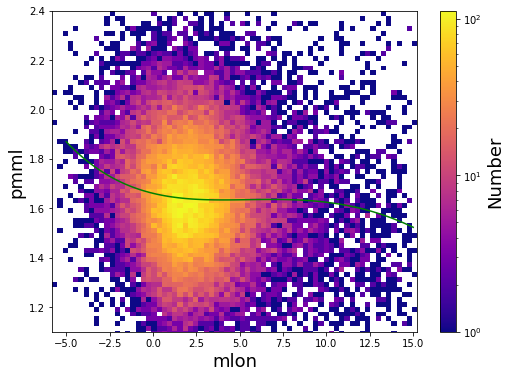

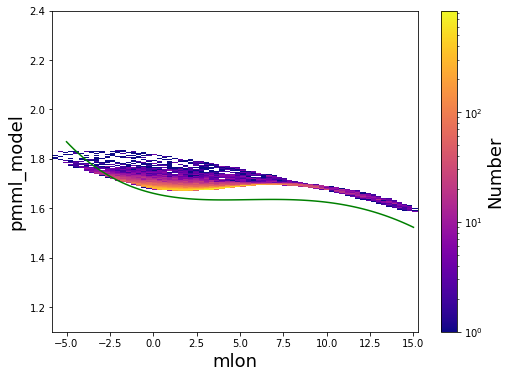

In [61]:
plt.figure(figsize=(18,13))

plt.subplot(2,2,1)
plt.hist2d(RGB_CMD_cut['mlon'], RGB_CMD_cut['pmml'],
           range=None, bins=70, cmap='plasma', norm=LogNorm(), cmin=None)

cbar = plt.colorbar(mappable=None, cax=None, ax=None)

model1 = np.poly1d(np.polyfit(RGB_CMD_cut['mlon'], RGB_CMD_cut['pmml'] , 4))
polyline = np.linspace(15, -5, 100)
plt.plot(polyline, model1(polyline), color='green')
plt.xlabel('mlon', fontsize=18)
plt.ylabel('pmml', fontsize=18)
# plt.xlim(-3,6.5)
plt.ylim(1.1,2.4)
cbar.set_label('Number', fontsize=18)
plt.show()


plt.figure(figsize=(18,13))

plt.subplot(2,2,2)
plt.hist2d(RGB_CMD_cut['mlon'], RGB_CMD_cut['pmml_model'],
           range=None, bins=70, cmap='plasma', norm=LogNorm(), cmin=None)

cbar = plt.colorbar(mappable=None, cax=None, ax=None)

model1 = np.poly1d(np.polyfit(RGB_CMD_cut['mlon'], RGB_CMD_cut['pmml'] , 4))
polyline = np.linspace(15, -5, 100)
plt.plot(polyline, model1(polyline), color='green')

# model2 = np.poly1d(np.polyfit(RGB_CMD_cut['mlon'], RGB_CMD_cut['pmml_model'] , 4))
# polyline1 = np.linspace(15, -5, 100)
# plt.plot(polyline1, model2(polyline1), color='green')
plt.xlabel('mlon', fontsize=18)
plt.ylabel('pmml_model', fontsize=18)
# plt.xlim(-3,6.5)
plt.ylim(1.1,2.4)
cbar.set_label('Number', fontsize=18)
plt.show()

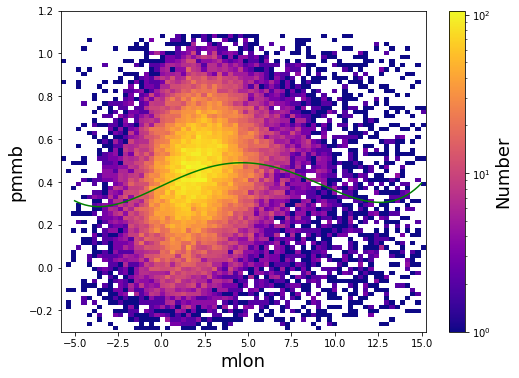

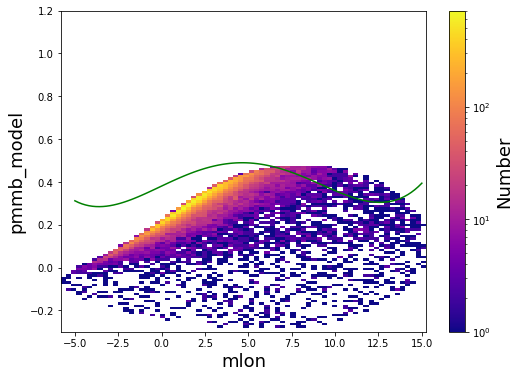

In [60]:
plt.figure(figsize=(18,13))

plt.subplot(2,2,1)

plt.hist2d(RGB_CMD_cut['mlon'], RGB_CMD_cut['pmmb'],
           range=None, bins=70, cmap='plasma', norm=LogNorm(), cmin=None)

cbar = plt.colorbar(mappable=None, cax=None, ax=None)

model1 = np.poly1d(np.polyfit(RGB_CMD_cut['mlon'], RGB_CMD_cut['pmmb'] , 4))
polyline = np.linspace(15, -5, 100)
plt.plot(polyline, model1(polyline), color='green')
plt.xlabel('mlon', fontsize=18)
plt.ylabel('pmmb', fontsize=18)
# plt.xlim(-3,6.5)
plt.ylim(-0.3,1.2)
cbar.set_label('Number', fontsize=18)
plt.show()



plt.figure(figsize=(18,13))

plt.subplot(2,2,2)
plt.hist2d(RGB_CMD_cut['mlon'], RGB_CMD_cut['pmmb_model'],
           range=None, bins=70, cmap='plasma', norm=LogNorm(), cmin=None)

cbar = plt.colorbar(mappable=None, cax=None, ax=None)

model1 = np.poly1d(np.polyfit(RGB_CMD_cut['mlon'], RGB_CMD_cut['pmmb'] , 4))
polyline = np.linspace(15, -5, 100)
plt.plot(polyline, model1(polyline), color='green')

# model2 = np.poly1d(np.polyfit(RGB_CMD_cut['mlon'], RGB_CMD_cut['pmmb_model'] , 4))
# polyline1 = np.linspace(15, -5, 100)
# plt.plot(polyline1, model2(polyline1), color='green')
plt.xlabel('mlon', fontsize=18)
plt.ylabel('pmmb_model', fontsize=18)
# plt.xlim(-3,6.5)
plt.ylim(-0.3,1.2)
cbar.set_label('Number', fontsize=18)
plt.show()

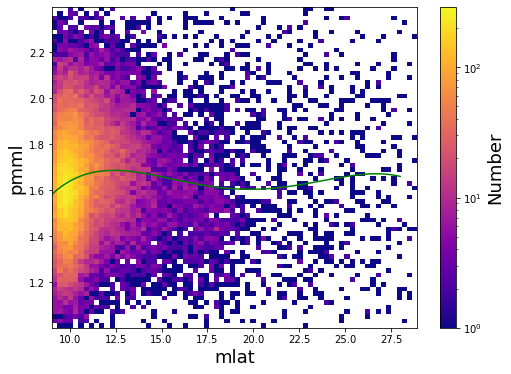

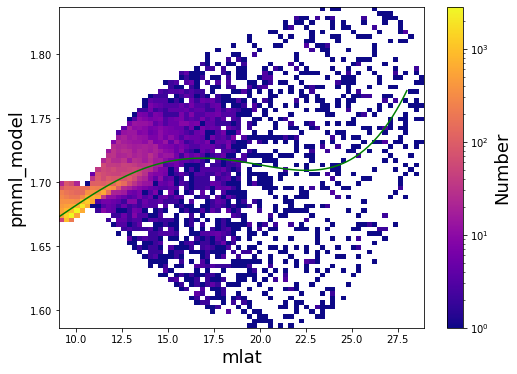

In [43]:
plt.figure(figsize=(18,13))

plt.subplot(2,2,1)

plt.hist2d(RGB_CMD_cut['mlat'], RGB_CMD_cut['pmml'],
           range=None, bins=70, cmap='plasma', norm=LogNorm(), cmin=None)

cbar = plt.colorbar(mappable=None, cax=None, ax=None)

model1 = np.poly1d(np.polyfit(RGB_CMD_cut['mlat'], RGB_CMD_cut['pmml'] , 4))
polyline = np.linspace(9, 28, 100)
plt.plot(polyline, model1(polyline), color='green')
plt.xlabel('mlat', fontsize=18)
plt.ylabel('pmml', fontsize=18)
# plt.xlim(-3,6.5)
# plt.ylim(1.5,1.9)
cbar.set_label('Number', fontsize=18)
plt.show()



plt.figure(figsize=(18,13))

plt.subplot(2,2,2)
plt.hist2d(RGB_CMD_cut['mlat'], RGB_CMD_cut['pmml_model'],
           range=None, bins=70, cmap='plasma', norm=LogNorm(), cmin=None)

cbar = plt.colorbar(mappable=None, cax=None, ax=None)

model2 = np.poly1d(np.polyfit(RGB_CMD_cut['mlat'], RGB_CMD_cut['pmml_model'] , 4))
polyline1 = np.linspace(9, 28, 100)
plt.plot(polyline1, model2(polyline1), color='green')
plt.xlabel('mlat', fontsize=18)
plt.ylabel('pmml_model', fontsize=18)
# plt.xlim(-3,6.5)
# plt.ylim(0.8,2.4)
cbar.set_label('Number', fontsize=18)
plt.show()

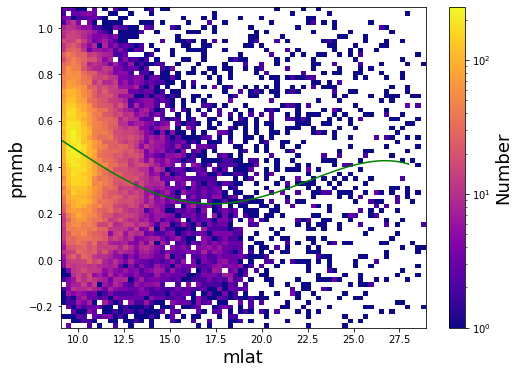

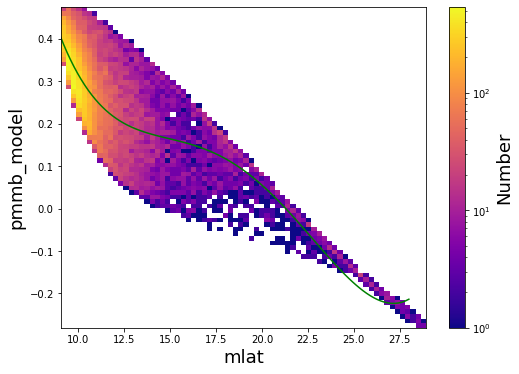

In [45]:
plt.figure(figsize=(18,13))

plt.subplot(2,2,1)

plt.hist2d(RGB_CMD_cut['mlat'], RGB_CMD_cut['pmmb'],
           range=None, bins=70, cmap='plasma', norm=LogNorm(), cmin=None)

cbar = plt.colorbar(mappable=None, cax=None, ax=None)

model1 = np.poly1d(np.polyfit(RGB_CMD_cut['mlat'], RGB_CMD_cut['pmmb'] , 4))
polyline = np.linspace(9, 28, 100)
plt.plot(polyline, model1(polyline), color='green')
plt.xlabel('mlat', fontsize=18)
plt.ylabel('pmmb', fontsize=18)
# plt.xlim(-3,6.5)
# plt.ylim(0.8,2.4)
cbar.set_label('Number', fontsize=18)
plt.show()



plt.figure(figsize=(18,13))

plt.subplot(2,2,2)
plt.hist2d(RGB_CMD_cut['mlat'], RGB_CMD_cut['pmmb_model'],
           range=None, bins=70, cmap='plasma', norm=LogNorm(), cmin=None)

cbar = plt.colorbar(mappable=None, cax=None, ax=None)

model2 = np.poly1d(np.polyfit(RGB_CMD_cut['mlat'], RGB_CMD_cut['pmmb_model'] , 4))
polyline1 = np.linspace(9, 28, 100)
plt.plot(polyline1, model2(polyline1), color='green')
plt.xlabel('mlat', fontsize=18)
plt.ylabel('pmmb_model', fontsize=18)
# plt.xlim(-3,6.5)
# plt.ylim(0.8,2.4)
cbar.set_label('Number', fontsize=18)
plt.show()

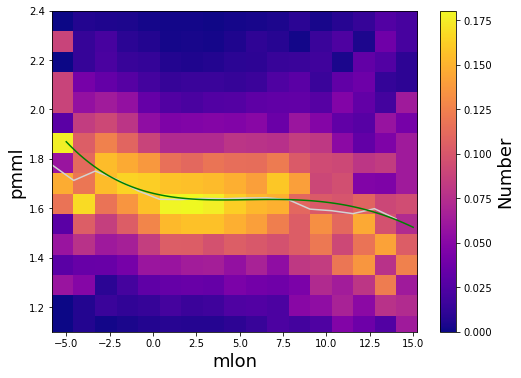

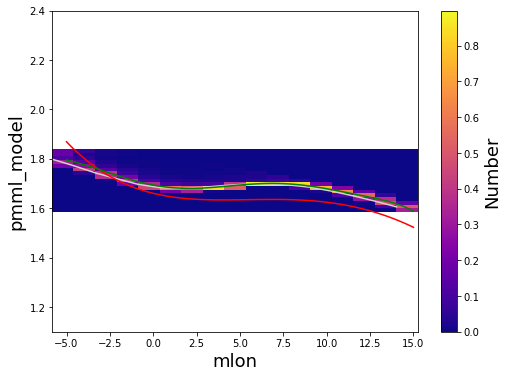

In [65]:
from scipy.stats import binned_statistic, binned_statistic_2d

plt.figure(figsize=(18,13))

plt.subplot(2,2,1)
result,xedge,yedge,binnumber = binned_statistic_2d(RGB_CMD_cut['mlon'], RGB_CMD_cut['pmml'], RGB_CMD_cut['pmml'],
                statistic = "count", bins=17)

colsum = np.sum(result, axis= 1)
result2 = result/colsum.reshape(-1,1)

plt.imshow(result2.T,extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]], origin="lower", aspect="auto", cmap="plasma")

cbar = plt.colorbar(mappable=None, cax=None, ax=None)
result,xedge,binnumber = binned_statistic(RGB_CMD_cut['mlon'], RGB_CMD_cut['pmml'],
                statistic = "mean", bins=17)
plt.plot(xedge[:-1],result, c='lightgray')

model2 = np.poly1d(np.polyfit(RGB_CMD_cut['mlon'], RGB_CMD_cut['pmml'] , 4))
polyline = np.linspace(-5, 15, 100)
plt.plot(polyline, model2(polyline), color='green')

# plt.xlim(15,-5)
plt.xlabel('mlon', fontsize=18)
plt.ylabel('pmml', fontsize=18)
# plt.xlim(1,2.5)
plt.ylim(1.1,2.4)
cbar.set_label('Number', fontsize=18)
plt.show()



plt.figure(figsize=(18,13))
plt.subplot(2,2,2)
result2,xedge,yedge,binnumber = binned_statistic_2d(RGB_CMD_cut['mlon'], RGB_CMD_cut['pmml_model'], RGB_CMD_cut['pmml_model'],
                statistic = "count", bins=17)

colsum1 = np.sum(result2, axis= 1)
result3 = result2/colsum1.reshape(-1,1)

plt.imshow(result3.T,extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]], origin="lower", aspect="auto", cmap="plasma")

cbar = plt.colorbar(mappable=None, cax=None, ax=None)
result,xedge,binnumber = binned_statistic(RGB_CMD_cut['mlon'], RGB_CMD_cut['pmml_model'],
                statistic = "mean", bins=17)
plt.plot(xedge[:-1],result, c='lightgray')

model2 = np.poly1d(np.polyfit(RGB_CMD_cut['mlon'], RGB_CMD_cut['pmml'] , 4))
polyline = np.linspace(-5, 15, 100)
plt.plot(polyline, model2(polyline), color='red')

model3 = np.poly1d(np.polyfit(RGB_CMD_cut['mlon'], RGB_CMD_cut['pmml_model'] ,7))
polyline1 = np.linspace(-5, 15, 100)
plt.plot(polyline1, model3(polyline1), color='green')

# plt.xlim(15,-5)
plt.xlabel('mlon', fontsize=18)
plt.ylabel('pmml_model', fontsize=18)
# plt.xlim(1,2.5)
plt.ylim(1.1,2.4)
cbar.set_label('Number', fontsize=18)
plt.show()

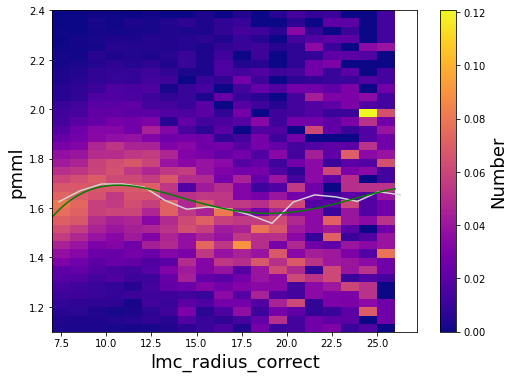

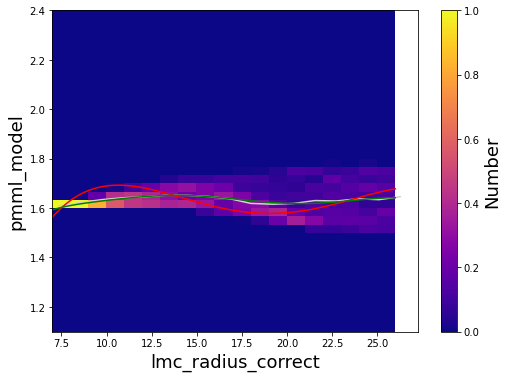

In [84]:
from scipy.stats import binned_statistic, binned_statistic_2d

plt.figure(figsize=(18,13))

plt.subplot(2,2,1)

rbins = np.linspace(7,26, 20)
pmbins = np.linspace(1.1,2.4, 40)

result,xedge,yedge,binnumber = binned_statistic_2d(RGB_CMD_cut['lmc_radius_correct'], RGB_CMD_cut['pmml'], RGB_CMD_cut['pmml'],
                statistic = "count", bins=[rbins,pmbins])

colsum = np.sum(result, axis= 1)
result2 = result/colsum.reshape(-1,1)

plt.imshow(result2.T,extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]], origin="lower", aspect="auto", cmap="plasma")

cbar = plt.colorbar(mappable=None, cax=None, ax=None)
result,xedge,binnumber = binned_statistic(RGB_CMD_cut['lmc_radius_correct'], RGB_CMD_cut['pmml'],
                statistic = "mean", bins=17)
plt.plot(xedge[:-1],result, c='lightgray')

model2 = np.poly1d(np.polyfit(RGB_CMD_cut['lmc_radius_correct'], RGB_CMD_cut['pmml'] , 4))
polyline = np.linspace(7, 26, 100)
plt.plot(polyline, model2(polyline), color='green')

# plt.xlim(15,-5)
plt.xlabel('lmc_radius_correct', fontsize=18)
plt.ylabel('pmml', fontsize=18)
# plt.xlim(1,2.5)
plt.ylim(1.1,2.4)
cbar.set_label('Number', fontsize=18)
plt.show()



plt.figure(figsize=(18,13))
plt.subplot(2,2,2)

# rbins = np.linspace(7,26, 20)
# pmbins = np.linspace(1.1,2.4, 40)
result2,xedge,yedge,binnumber = binned_statistic_2d(RGB_CMD_cut['lmc_radius_correct'], RGB_CMD_cut['pmml_model'] - 0.07, RGB_CMD_cut['pmml_model'],
                statistic = "count", bins=[rbins, pmbins])

colsum1 = np.sum(result2, axis= 1)
result3 = result2/colsum1.reshape(-1,1)

plt.imshow(result3.T,extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]], origin="lower", aspect="auto", cmap="plasma")

cbar = plt.colorbar(mappable=None, cax=None, ax=None)
result,xedge,binnumber = binned_statistic(RGB_CMD_cut['lmc_radius_correct'], RGB_CMD_cut['pmml_model']- 0.07,
                statistic = "mean", bins=17)
plt.plot(xedge[:-1],result, c='lightgray')

model2 = np.poly1d(np.polyfit(RGB_CMD_cut['lmc_radius_correct'], RGB_CMD_cut['pmml'] , 4))
polyline = np.linspace(7, 26, 100)
plt.plot(polyline, model2(polyline), color='red')

model3 = np.poly1d(np.polyfit(RGB_CMD_cut['lmc_radius_correct'], RGB_CMD_cut['pmml_model']- 0.07 ,7))
polyline1 = np.linspace(7, 26, 100)
plt.plot(polyline1, model3(polyline1), color='green')

# plt.xlim(15,-5)
plt.xlabel('lmc_radius_correct', fontsize=18)
plt.ylabel('pmml_model', fontsize=18)
# plt.xlim(1,2.5)
plt.ylim(1.1,2.4)
cbar.set_label('Number', fontsize=18)
plt.show()

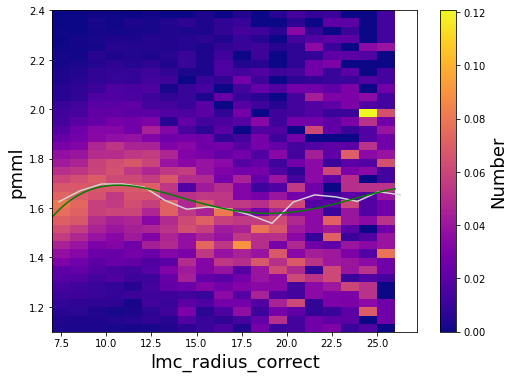

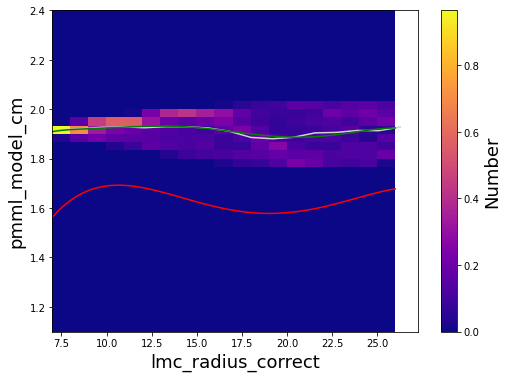

In [94]:
from scipy.stats import binned_statistic, binned_statistic_2d

plt.figure(figsize=(18,13))

plt.subplot(2,2,1)

rbins = np.linspace(7,26, 20)
pmbins = np.linspace(1.1,2.4, 40)

result,xedge,yedge,binnumber = binned_statistic_2d(RGB_CMD_cut['lmc_radius_correct'], RGB_CMD_cut['pmml'], RGB_CMD_cut['pmml'],
                statistic = "count", bins=[rbins,pmbins])

colsum = np.sum(result, axis= 1)
result2 = result/colsum.reshape(-1,1)

plt.imshow(result2.T,extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]], origin="lower", aspect="auto", cmap="plasma")

cbar = plt.colorbar(mappable=None, cax=None, ax=None)
result,xedge,binnumber = binned_statistic(RGB_CMD_cut['lmc_radius_correct'], RGB_CMD_cut['pmml'],
                statistic = "mean", bins=17)
plt.plot(xedge[:-1],result, c='lightgray')

model2 = np.poly1d(np.polyfit(RGB_CMD_cut['lmc_radius_correct'], RGB_CMD_cut['pmml'] , 4))
polyline = np.linspace(7, 26, 100)
plt.plot(polyline, model2(polyline), color='green')

# plt.xlim(15,-5)
plt.xlabel('lmc_radius_correct', fontsize=18)
plt.ylabel('pmml', fontsize=18)
# plt.xlim(1,2.5)
plt.ylim(1.1,2.4)
cbar.set_label('Number', fontsize=18)
plt.show()



plt.figure(figsize=(18,13))
plt.subplot(2,2,2)

# rbins = np.linspace(7,26, 20)
# pmbins = np.linspace(1.1,2.4, 40)
result2,xedge,yedge,binnumber = binned_statistic_2d(RGB_CMD_cut['lmc_radius_correct'], RGB_CMD_cut['pmml_model_cm'] - 0.07, RGB_CMD_cut['pmml_model'],
                statistic = "count", bins=[rbins, pmbins])

colsum1 = np.sum(result2, axis= 1)
result3 = result2/colsum1.reshape(-1,1)

plt.imshow(result3.T,extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]], origin="lower", aspect="auto", cmap="plasma")

cbar = plt.colorbar(mappable=None, cax=None, ax=None)
result,xedge,binnumber = binned_statistic(RGB_CMD_cut['lmc_radius_correct'], RGB_CMD_cut['pmml_model_cm']- 0.07,
                statistic = "mean", bins=17)
plt.plot(xedge[:-1],result, c='lightgray')

model2 = np.poly1d(np.polyfit(RGB_CMD_cut['lmc_radius_correct'], RGB_CMD_cut['pmml'] , 4))
polyline = np.linspace(7, 26, 100)
plt.plot(polyline, model2(polyline), color='red')

model3 = np.poly1d(np.polyfit(RGB_CMD_cut['lmc_radius_correct'], RGB_CMD_cut['pmml_model_cm']- 0.07 ,7))
polyline1 = np.linspace(7, 26, 100)
plt.plot(polyline1, model3(polyline1), color='green')

# plt.xlim(15,-5)
plt.xlabel('lmc_radius_correct', fontsize=18)
plt.ylabel('pmml_model_cm', fontsize=18)
# plt.xlim(1,2.5)
plt.ylim(1.1,2.4)
cbar.set_label('Number', fontsize=18)
plt.show()

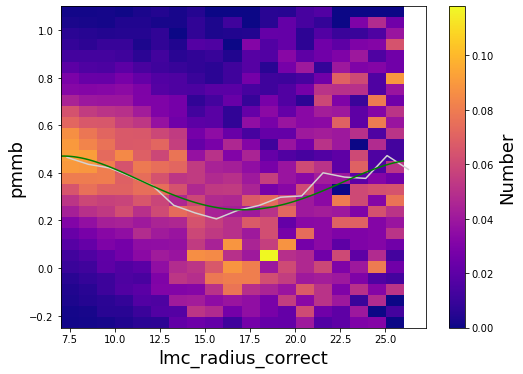

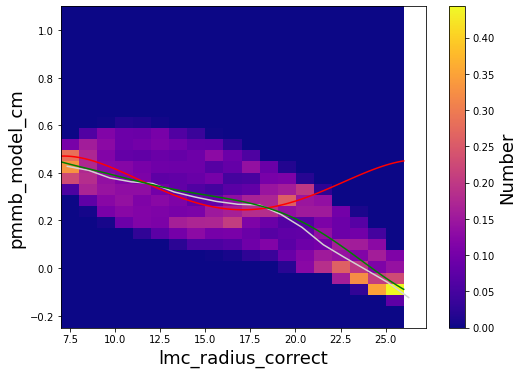

In [93]:
from scipy.stats import binned_statistic, binned_statistic_2d

plt.figure(figsize=(18,13))

plt.subplot(2,2,1)

rbins = np.linspace(7,26, 20)
pmbins = np.linspace(-0.25,1.1, 30)

result,xedge,yedge,binnumber = binned_statistic_2d(RGB_CMD_cut['lmc_radius_correct'], RGB_CMD_cut['pmmb'], RGB_CMD_cut['pmmb'],
                statistic = "count", bins=[rbins,pmbins])

colsum = np.sum(result, axis= 1)
result2 = result/colsum.reshape(-1,1)

plt.imshow(result2.T,extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]], origin="lower", aspect="auto", cmap="plasma")

cbar = plt.colorbar(mappable=None, cax=None, ax=None)
result,xedge,binnumber = binned_statistic(RGB_CMD_cut['lmc_radius_correct'], RGB_CMD_cut['pmmb'],
                statistic = "mean", bins=17)
plt.plot(xedge[:-1],result, c='lightgray')

model2 = np.poly1d(np.polyfit(RGB_CMD_cut['lmc_radius_correct'], RGB_CMD_cut['pmmb'] , 4))
polyline = np.linspace(7, 26, 100)
plt.plot(polyline, model2(polyline), color='green')

# plt.xlim(15,-5)
plt.xlabel('lmc_radius_correct', fontsize=18)
plt.ylabel('pmmb', fontsize=18)
# plt.xlim(1,2.5)
plt.ylim(-0.25,1.1)
cbar.set_label('Number', fontsize=18)
plt.show()



plt.figure(figsize=(18,13))
plt.subplot(2,2,2)
result2,xedge,yedge,binnumber = binned_statistic_2d(RGB_CMD_cut['lmc_radius_correct'], RGB_CMD_cut['pmmb_model'] + 0.12, RGB_CMD_cut['pmml_model'],
                statistic = "count", bins=[rbins,pmbins])

colsum1 = np.sum(result2, axis= 1)
result3 = result2/colsum1.reshape(-1,1)

plt.imshow(result3.T,extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]], origin="lower", aspect="auto", cmap="plasma")

cbar = plt.colorbar(mappable=None, cax=None, ax=None)
result,xedge,binnumber = binned_statistic(RGB_CMD_cut['lmc_radius_correct'], RGB_CMD_cut['pmmb_model']  + 0.12,
                statistic = "mean", bins=17)
plt.plot(xedge[:-1],result, c='lightgray')

model2 = np.poly1d(np.polyfit(RGB_CMD_cut['lmc_radius_correct'], RGB_CMD_cut['pmmb'] , 4))
polyline = np.linspace(7, 26, 100)
plt.plot(polyline, model2(polyline), color='red')

model3 = np.poly1d(np.polyfit(RGB_CMD_cut['lmc_radius_correct'], RGB_CMD_cut['pmmb_model']  + 0.12 ,7))
polyline1 = np.linspace(7, 26, 100)
plt.plot(polyline1, model3(polyline1), color='green')

# plt.xlim(15,-5)
plt.xlabel('lmc_radius_correct', fontsize=18)
plt.ylabel('pmmb_model_cm', fontsize=18)
# plt.xlim(1,2.5)
plt.ylim(-0.25,1.1)
cbar.set_label('Number', fontsize=18)
plt.show()

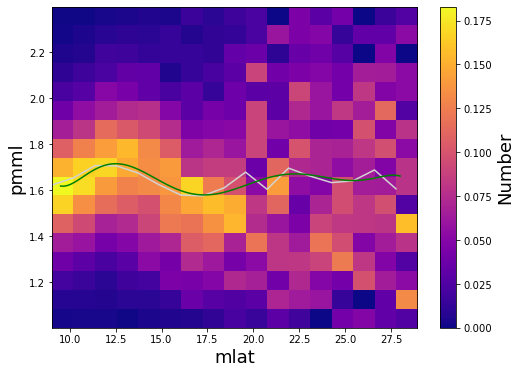

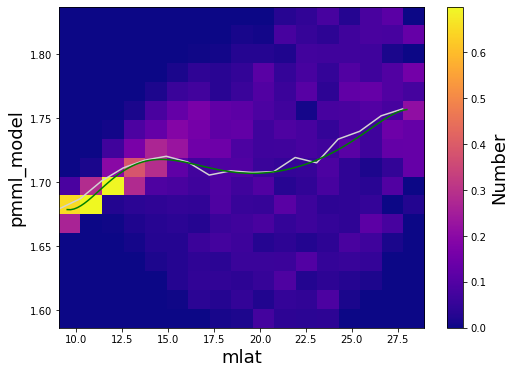

In [55]:
from scipy.stats import binned_statistic, binned_statistic_2d

plt.figure(figsize=(18,13))

plt.subplot(2,2,1)
result,xedge,yedge,binnumber = binned_statistic_2d(RGB_CMD_cut['mlat'], RGB_CMD_cut['pmml'], RGB_CMD_cut['pmml'],
                statistic = "count", bins=17)

colsum = np.sum(result, axis= 1)
result2 = result/colsum.reshape(-1,1)

plt.imshow(result2.T,extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]], origin="lower", aspect="auto", cmap="plasma")

cbar = plt.colorbar(mappable=None, cax=None, ax=None)
result,xedge,binnumber = binned_statistic(RGB_CMD_cut['mlat'], RGB_CMD_cut['pmml'],
                statistic = "mean", bins=17)
plt.plot(xedge[:-1],result, c='lightgray')

model2 = np.poly1d(np.polyfit(RGB_CMD_cut['mlat'], RGB_CMD_cut['pmml'] , 7))
polyline = np.linspace(9.5, 28, 100)
plt.plot(polyline, model2(polyline), color='green')

# plt.xlim(15,-5)
plt.xlabel('mlat', fontsize=18)
plt.ylabel('pmml', fontsize=18)
# plt.xlim(1,2.5)
# plt.ylim(-0.3,1.1)
cbar.set_label('Number', fontsize=18)
plt.show()



plt.figure(figsize=(18,13))
plt.subplot(2,2,2)
result2,xedge,yedge,binnumber = binned_statistic_2d(RGB_CMD_cut['mlat'], RGB_CMD_cut['pmml_model'], RGB_CMD_cut['pmml_model'],
                statistic = "count", bins=17)

colsum1 = np.sum(result2, axis= 1)
result3 = result2/colsum1.reshape(-1,1)

plt.imshow(result3.T,extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]], origin="lower", aspect="auto", cmap="plasma")

cbar = plt.colorbar(mappable=None, cax=None, ax=None)
result,xedge,binnumber = binned_statistic(RGB_CMD_cut['mlat'], RGB_CMD_cut['pmml_model'],
                statistic = "mean", bins=17)
plt.plot(xedge[:-1],result, c='lightgray')
model3 = np.poly1d(np.polyfit(RGB_CMD_cut['mlat'], RGB_CMD_cut['pmml_model'] ,7))
polyline1 = np.linspace(9.5, 28, 100)
plt.plot(polyline1, model3(polyline1), color='green')

# plt.xlim(15,-5)
plt.xlabel('mlat', fontsize=18)
plt.ylabel('pmml_model', fontsize=18)
# plt.xlim(1,2.5)
# plt.ylim(-0.3,1.1)
cbar.set_label('Number', fontsize=18)
plt.show()

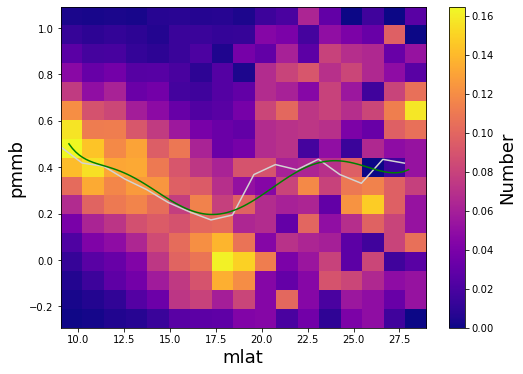

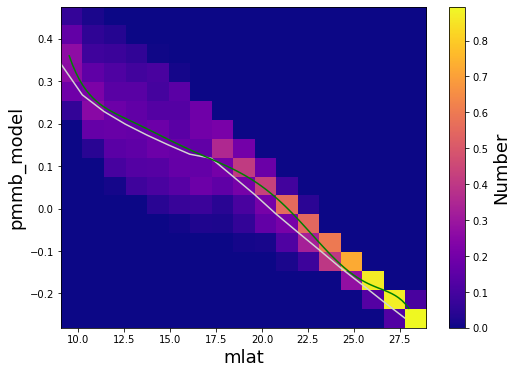

In [56]:
from scipy.stats import binned_statistic, binned_statistic_2d

plt.figure(figsize=(18,13))

plt.subplot(2,2,1)
result,xedge,yedge,binnumber = binned_statistic_2d(RGB_CMD_cut['mlat'], RGB_CMD_cut['pmmb'], RGB_CMD_cut['pmmb'],
                statistic = "count", bins=17)

colsum = np.sum(result, axis= 1)
result2 = result/colsum.reshape(-1,1)

plt.imshow(result2.T,extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]], origin="lower", aspect="auto", cmap="plasma")

cbar = plt.colorbar(mappable=None, cax=None, ax=None)
result,xedge,binnumber = binned_statistic(RGB_CMD_cut['mlat'], RGB_CMD_cut['pmmb'],
                statistic = "mean", bins=17)
plt.plot(xedge[:-1],result, c='lightgray')

model2 = np.poly1d(np.polyfit(RGB_CMD_cut['mlat'], RGB_CMD_cut['pmmb'] , 7))
polyline = np.linspace(9.5, 28, 100)
plt.plot(polyline, model2(polyline), color='green')

# plt.xlim(15,-5)
plt.xlabel('mlat', fontsize=18)
plt.ylabel('pmmb', fontsize=18)
# plt.xlim(1,2.5)
# plt.ylim(-0.3,1.1)
cbar.set_label('Number', fontsize=18)
plt.show()



plt.figure(figsize=(18,13))
plt.subplot(2,2,2)
result2,xedge,yedge,binnumber = binned_statistic_2d(RGB_CMD_cut['mlat'], RGB_CMD_cut['pmmb_model'], RGB_CMD_cut['pmmb_model'],
                statistic = "count", bins=17)

colsum1 = np.sum(result2, axis= 1)
result3 = result2/colsum1.reshape(-1,1)

plt.imshow(result3.T,extent=[xedge[0],xedge[-1],yedge[0],yedge[-1]], origin="lower", aspect="auto", cmap="plasma")

cbar = plt.colorbar(mappable=None, cax=None, ax=None)
result,xedge,binnumber = binned_statistic(RGB_CMD_cut['mlat'], RGB_CMD_cut['pmmb_model'],
                statistic = "mean", bins=17)
plt.plot(xedge[:-1],result, c='lightgray')
model3 = np.poly1d(np.polyfit(RGB_CMD_cut['mlat'], RGB_CMD_cut['pmmb_model'] ,7))
polyline1 = np.linspace(9.5, 28, 100)
plt.plot(polyline1, model3(polyline1), color='green')

# plt.xlim(15,-5)
plt.xlabel('mlat', fontsize=18)
plt.ylabel('pmmb_model', fontsize=18)
# plt.xlim(1,2.5)
# plt.ylim(-0.3,1.1)
cbar.set_label('Number', fontsize=18)
plt.show()